In [3]:
 # importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=None

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# importing the dataset

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML COURSE PROJECT/public_data_waste_fee.csv")


In [6]:
# dataset shape

data_shape = data.shape

print("\nNumber of data points in the given dataset is :",data_shape[0])
print("\nNumber of attributes in the given dataset is:",data_shape[1]-1) #one column is dependent variable


Number of data points in the given dataset is : 4341

Number of attributes in the given dataset is: 38


In [7]:
# List of features

mycol = data.columns
print(mycol)


Index(['region', 'province', 'name', 'tc', 'cres', 'csor', 'istat', 'area',
       'pop', 'alt', 'isle', 'sea', 'pden', 'wden', 'urb', 'fee', 'd_fee',
       'sample', 'organic', 'paper', 'glass', 'wood', 'metal', 'plastic',
       'raee', 'texile', 'other', 'msw_so', 'msw_un', 'msw', 'sor', 'geo',
       'roads', 's_wteregio', 's_landfill', 'gdp', 'proads', 'wage',
       'finance'],
      dtype='object')


In [8]:
# Features having null values in percentage
null_data=data.isnull().sum()*100/len(data)
null_data


region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
wden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
gdp            8.891960
proads        10.205022
wage           6.565308
finance        8.891960
dtype: float64

In [9]:
#number of NaN values corresponding to particular features
data.isnull().sum()

region           0
province         0
name             6
tc               0
cres            52
csor            67
istat            0
area             6
pop              0
alt              6
isle             6
sea              6
pden             6
wden             6
urb              6
fee              0
d_fee            0
sample           0
organic        512
paper           25
glass           33
wood          1095
metal          246
plastic         39
raee           314
texile        1013
other          136
msw_so           0
msw_un           0
msw              0
sor              0
geo            285
roads          443
s_wteregio     285
s_landfill     285
gdp            386
proads         443
wage           285
finance        386
dtype: int64

In [10]:
#dataset with finance(dependent variable) value not NaN
u1_data=data[data['finance'].notna()]


#### *We are removing those datapoints which do not have the target variable(finance) since we can't do anything for this case*

In [11]:
#getting the shape of data after first update(U1_data)
print("Shape of the data after removing NaN value from finance(dependent variable) column: ",u1_data.shape )

Shape of the data after removing NaN value from finance(dependent variable) column:  (3955, 39)


In [12]:
#missing value report in percentage of the data(u1_data) after removing NaN rows in finance
u1_data.isnull().sum()*100/len(u1_data)




region         0.000000
province       0.000000
name           0.000000
tc             0.000000
cres           0.859671
csor           1.390645
istat          0.000000
area           0.000000
pop            0.000000
alt            0.000000
isle           0.000000
sea            0.000000
pden           0.000000
wden           0.000000
urb            0.000000
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.934260
paper          0.556258
glass          0.707965
wood          23.236410
metal          5.132743
plastic        0.834387
raee           6.877370
texile        22.907712
other          2.907712
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            0.000000
roads          1.441214
s_wteregio     0.000000
s_landfill     0.000000
gdp            0.000000
proads         1.441214
wage           0.000000
finance        0.000000
dtype: float64

In [13]:
#missing value report in percentage of the data(u1_data) after removing NaN rows in finance
u1_data.isnull().sum()


region          0
province        0
name            0
tc              0
cres           34
csor           55
istat           0
area            0
pop             0
alt             0
isle            0
sea             0
pden            0
wden            0
urb             0
fee             0
d_fee           0
sample          0
organic       472
paper          22
glass          28
wood          919
metal         203
plastic        33
raee          272
texile        906
other         115
msw_so          0
msw_un          0
msw             0
sor             0
geo             0
roads          57
s_wteregio      0
s_landfill      0
gdp             0
proads         57
wage            0
finance         0
dtype: int64

### **Numeric columns**

In [14]:
numeric_feature_list=u1_data._get_numeric_data().columns
print("numeric feature list: ", numeric_feature_list)

numeric feature list:  Index(['tc', 'cres', 'csor', 'istat', 'area', 'pop', 'alt', 'isle', 'sea',
       'pden', 'wden', 'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass',
       'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'msw_so',
       'msw_un', 'msw', 'sor', 'geo', 'roads', 's_wteregio', 's_landfill',
       'gdp', 'proads', 'wage', 'finance'],
      dtype='object')


In [15]:
# Extracting non numeric features
non_numeric_feature=list(set(u1_data.columns)-set(u1_data._get_numeric_data().columns))
print("non numeric feature list: ",non_numeric_feature)

non numeric feature list:  ['region', 'name', 'province', 'fee']


In [16]:
# creating data frame of non numeric feature list
df=pd.DataFrame(u1_data,columns=non_numeric_feature)
df.head(5)

,region,name,province,fee
0,Emilia_Romagna,Comacchio,Ferrara,PAYT
1,Emilia_Romagna,Lagosanto,Ferrara,PAYT
2,Emilia_Romagna,Goro,Ferrara,PAYT
3,Emilia_Romagna,Mesola,Ferrara,PAYT
4,Puglia,Margherita di Savoia,Barletta-Andria-Trani,STANDARD


In [17]:
#getting distinct values in the non numeric features
df.nunique(axis=0)

region        20
name        3953
province     101
fee            2
dtype: int64

In [18]:
##Here number of different data points in the "name" feature is 3953 and total number of data points in the "name" feature\
## is 3955 and it is a categorical feature we can drop this feature since it doesn't add any extra information to the data other than the uniqueness of the dataset.
u2_data=u1_data.drop(['name'], axis=1)

In [19]:
u2_data.head()

,region,province,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [20]:
u2_data.fee

0           PAYT
1           PAYT
2           PAYT
3           PAYT
4       STANDARD
          ...   
4330    STANDARD
4331        PAYT
4332        PAYT
4333        PAYT
4334        PAYT
Name: fee, Length: 3955, dtype: object

In [21]:
#one hot encoding for 'fee'
fee_col=pd.get_dummies(u2_data['fee'])
fee_colpos=u2_data.columns.get_loc('fee')
df_fee1=u2_data.iloc[:,:fee_colpos]
df_fee2=u2_data.iloc[:,fee_colpos+1:]
u3_data=pd.concat([df_fee1,fee_col,df_fee2],axis=1)
u3_data.head()

,region,province,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,PAYT,STANDARD,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,1,0,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,1,0,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,1,0,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,1,0,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,0,1,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [22]:
#One hot encoding for 'region'
df_re=pd.get_dummies(u3_data['region'])
re_colpos=u3_data.columns.get_loc('region')
df_re1=u3_data.iloc[:,:re_colpos]
df_re2=u3_data.iloc[:,re_colpos+1:]
u4_data=pd.concat([df_re1,df_re,df_re2],axis=1)
u4_data.head()

,Abruzzo,Basilicata,Calabria,Campania,Emilia_Romagna,Friuli_Venezia_Giulia,Lazio,Liguria,Lombardia,Marche,Molise,Puglia,Sardegna,Sicilia,Toscana,Trentino_Alto_Adige,Umbria,Valle_d'Aosta,Veneto,piemonte,province,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,PAYT,STANDARD,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ferrara,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,1,0,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ferrara,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,1,0,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ferrara,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,1,0,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ferrara,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,1,0,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Barletta-Andria-Trani,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,0,1,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


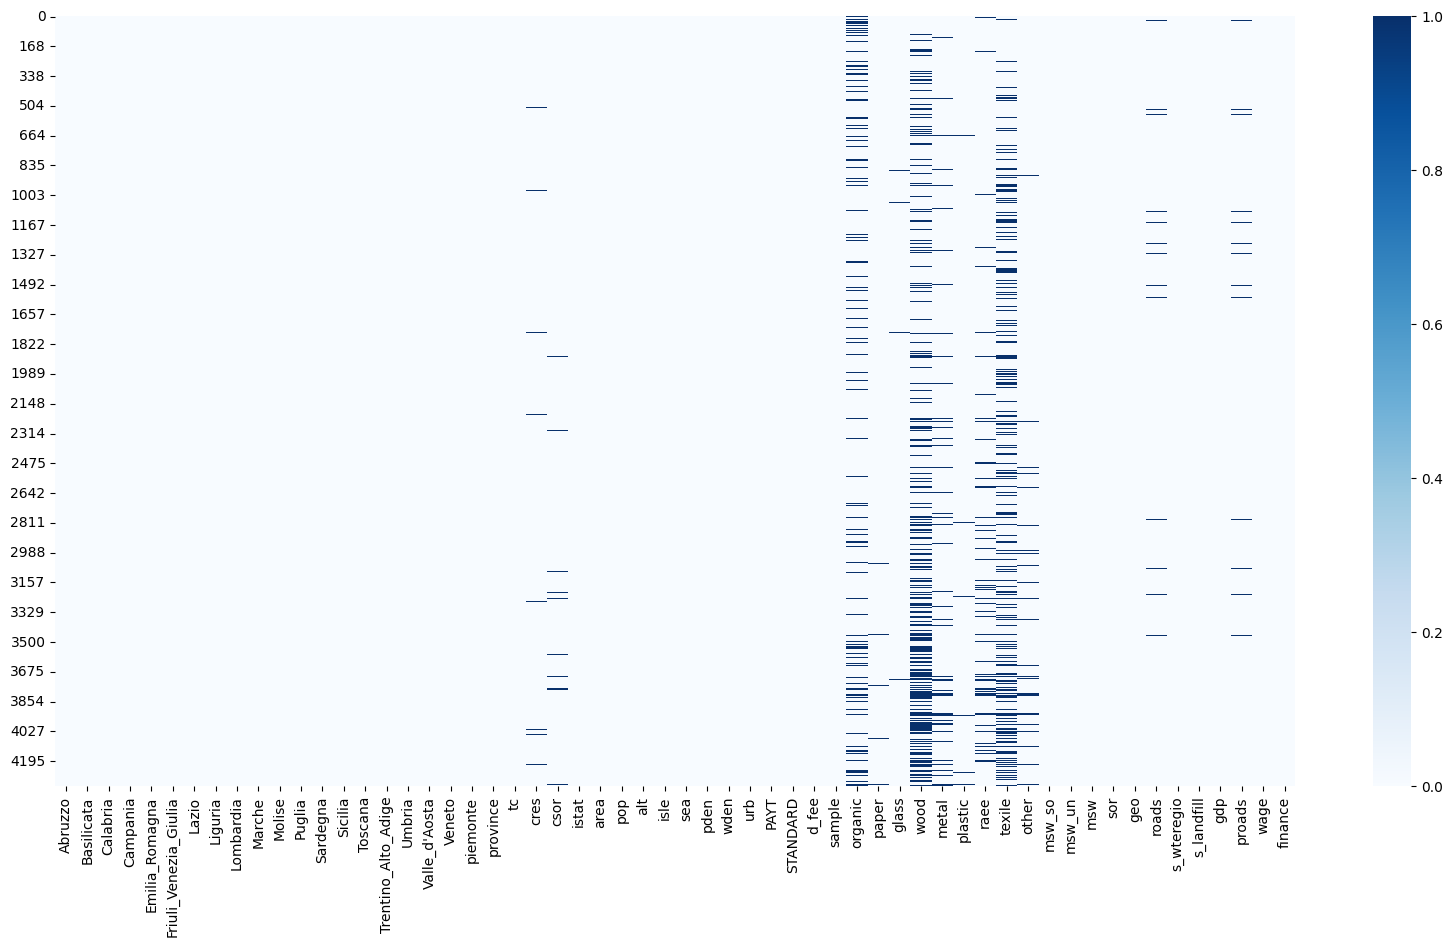

In [23]:
#Plot to show null values
f = plt.figure()
sns.heatmap(u4_data.isnull(), cmap="Blues", xticklabels=True, cbar=True)
f.set_figwidth(20)
f.set_figheight(10)
plt.show()

In [24]:
#Extracting the independent and dependent features as X and Y
Xu4=u4_data.drop('finance', axis=1)
Yu4=u4_data['finance']

In [25]:
#Splitting the independent and dependent features as train and test data
xu4_train, xu4_test, yu4_train, yu4_test=train_test_split(Xu4,Yu4,train_size=0.7,random_state=7)

#### For province, we are doing mean e

In [26]:
#Mean encoding for "province"
##train data:
df_train=pd.concat([xu4_train,yu4_train],axis=1)
Mean_encoded_province_tr = df_train.groupby(['province'])['finance'].mean().to_dict()
df_train['province']=df_train['province'].map(Mean_encoded_province_tr)
xu4_train=df_train.drop(['finance'],axis=1)
##test data:
df_test=pd.concat([xu4_test,yu4_test],axis=1)
Mean_encoded_province_ts = df_test.groupby(['province'])['finance'].mean().to_dict()
df_test['province']=df_test['province'].map(Mean_encoded_province_ts)
xu4_test=df_test.drop(['finance'],axis=1)

In [27]:
#null count in training set
print('following are the null values count in training set','\n',xu4_train.isnull().sum())

following are the null values count in training set 
 Abruzzo                    0
Basilicata                 0
Calabria                   0
Campania                   0
Emilia_Romagna             0
Friuli_Venezia_Giulia      0
Lazio                      0
Liguria                    0
Lombardia                  0
Marche                     0
Molise                     0
Puglia                     0
Sardegna                   0
Sicilia                    0
Toscana                    0
Trentino_Alto_Adige        0
Umbria                     0
Valle_d'Aosta              0
Veneto                     0
piemonte                   0
province                   0
tc                         0
cres                      28
csor                      36
istat                      0
area                       0
pop                        0
alt                        0
isle                       0
sea                        0
pden                       0
wden                       0
urb               

In [28]:
#null count in testing set set
print('following are the null values count in testing set','\n',xu4_test.isnull().sum())

following are the null values count in testing set 
 Abruzzo                    0
Basilicata                 0
Calabria                   0
Campania                   0
Emilia_Romagna             0
Friuli_Venezia_Giulia      0
Lazio                      0
Liguria                    0
Lombardia                  0
Marche                     0
Molise                     0
Puglia                     0
Sardegna                   0
Sicilia                    0
Toscana                    0
Trentino_Alto_Adige        0
Umbria                     0
Valle_d'Aosta              0
Veneto                     0
piemonte                   0
province                   0
tc                         0
cres                       6
csor                      19
istat                      0
area                       0
pop                        0
alt                        0
isle                       0
sea                        0
pden                       0
wden                       0
urb                

In [29]:
#Replacement of null values in features having null values less than 200 in training data and less than 100 in test data with linear interpolation:
##training set:
for feature in xu4_train.columns:
  if xu4_train[feature].isnull().sum()<200:
     xu4_train[feature].interpolate(method='linear', axis=0,inplace=True,limit_area='inside')
##test set:
for feature in xu4_test.columns:
  if xu4_test[feature].isnull().sum()<100:
     xu4_test[feature].interpolate(method='linear', axis=0,inplace=True,limit_area='inside')


In [30]:
#Analysis of the features having significant null values:
#training set
tr_null=pd.DataFrame(df_train[['organic','wood','texile','finance']])
tr_null_med=tr_null.copy()
tr_null_mean=tr_null.copy()

#### *Trying to analyze the the effect of null values vs non-null values of a feature in context of observing some statistical measure on the target variable*

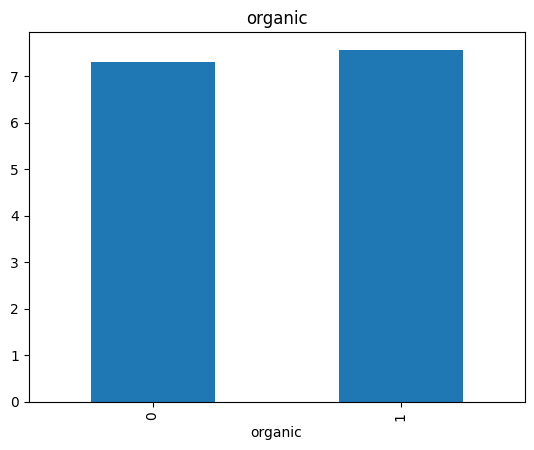

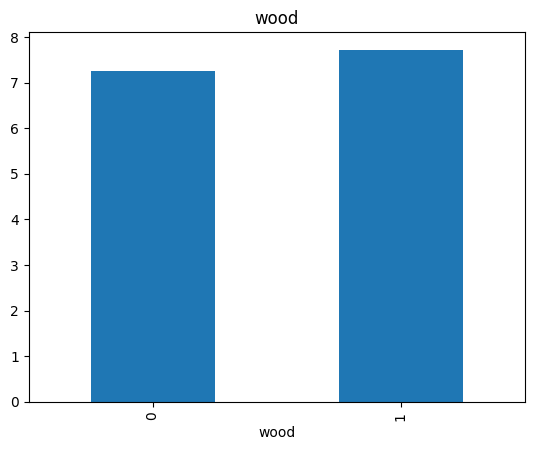

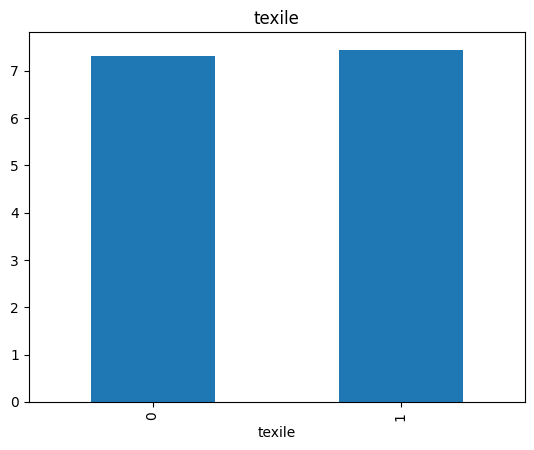

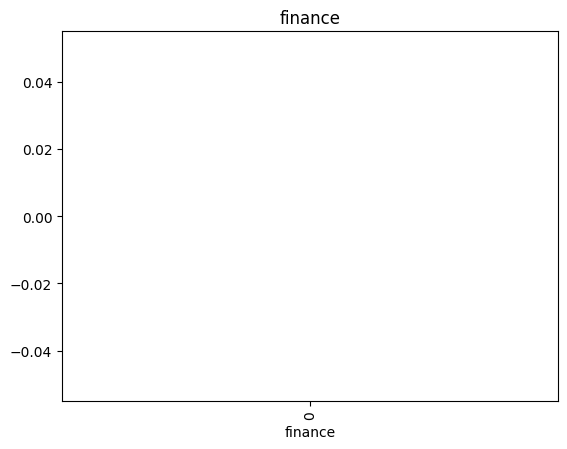

In [31]:
for feature in tr_null_med.columns:
    tr_null_med[feature]=np.where(tr_null_med[feature].isnull(), 1, 0)

    tr_null_med.groupby(feature)['finance'].median().plot.bar()
    plt.title(feature)
    plt.show()

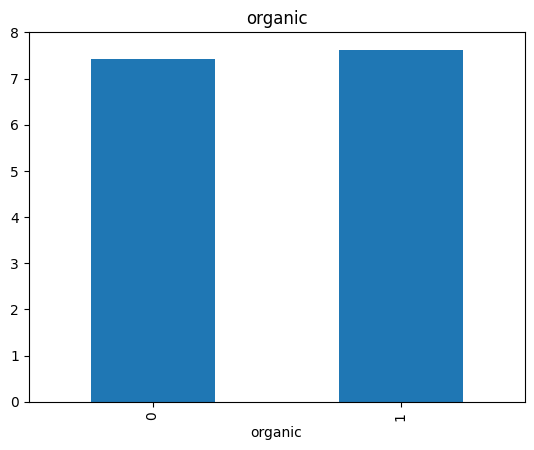

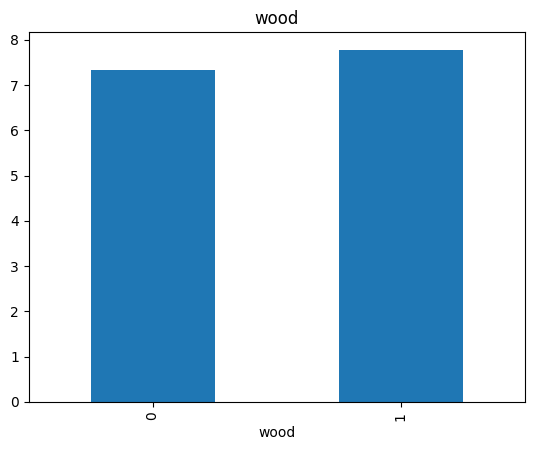

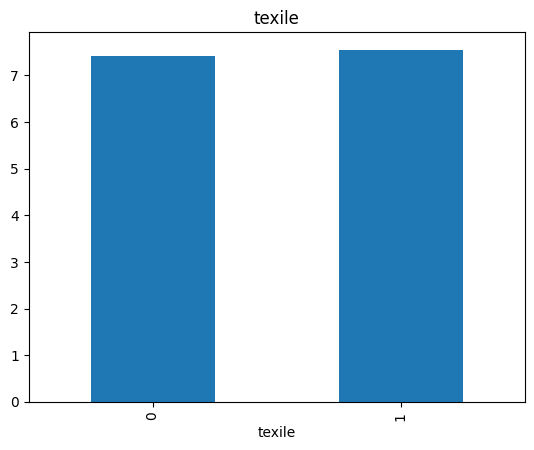

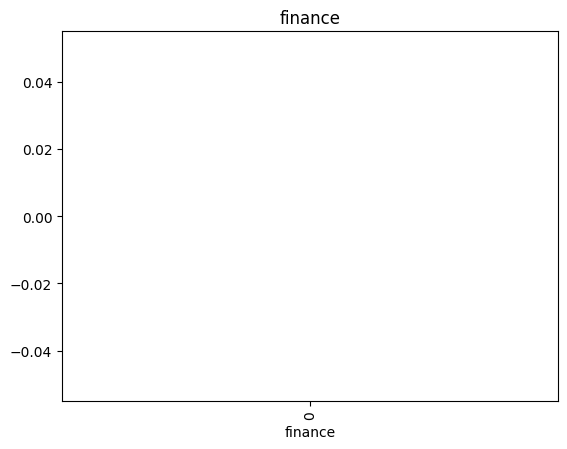

In [32]:
for feature in tr_null_mean.columns:
    tr_null_mean[feature]=np.where(tr_null_mean[feature].isnull(), 1, 0)

    tr_null_mean.groupby(feature)['finance'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [33]:
#Analysis of the features having significant null values:
#test set
ts_null=pd.DataFrame(df_test[['organic','wood','texile','finance']])
ts_null_med=ts_null.copy()
ts_null_mean=ts_null.copy()

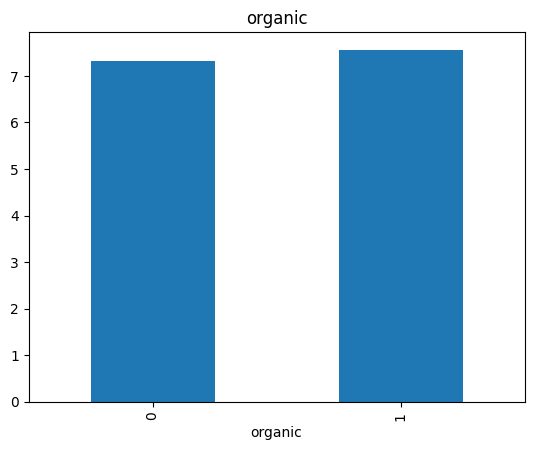

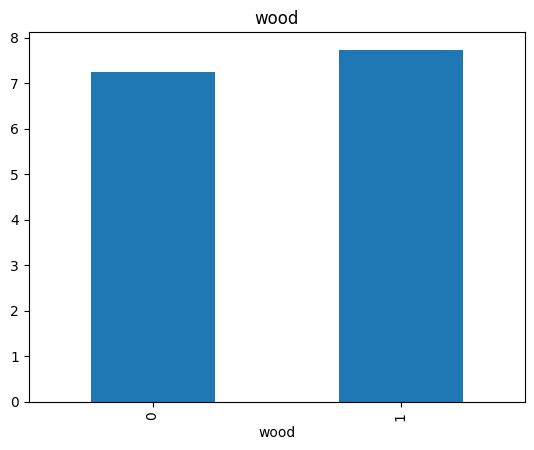

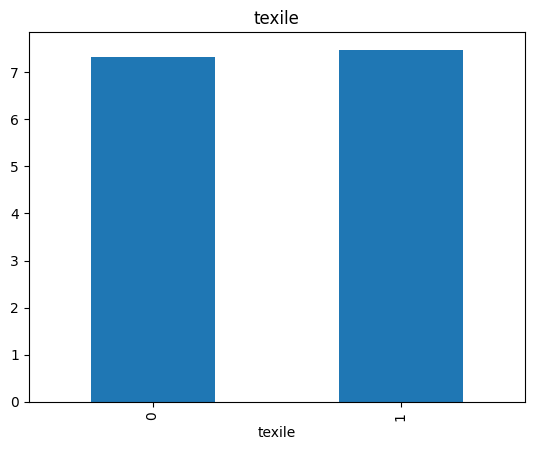

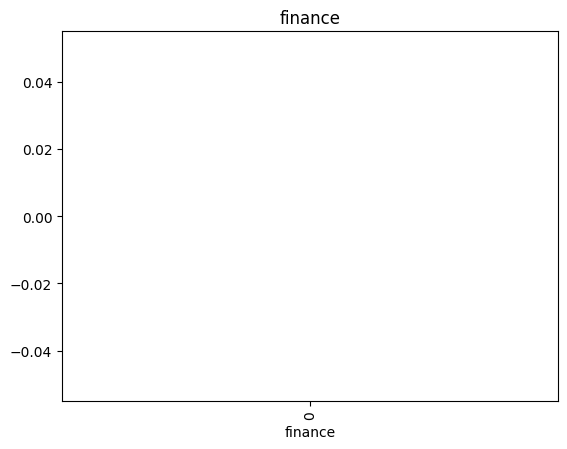

In [34]:
for feature in ts_null_med.columns:
    ts_null_med[feature]=np.where(ts_null_med[feature].isnull(), 1, 0)

    ts_null_med.groupby(feature)['finance'].median().plot.bar()
    plt.title(feature)
    plt.show()

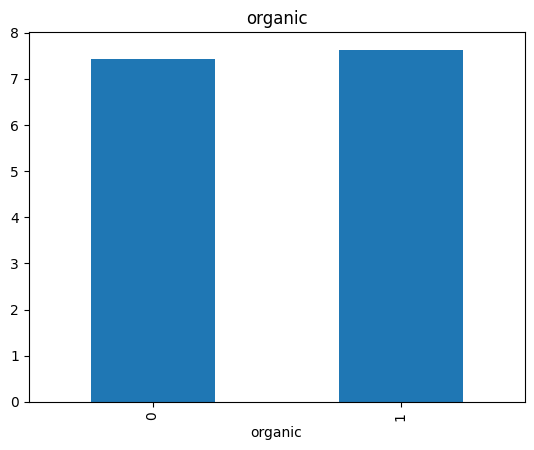

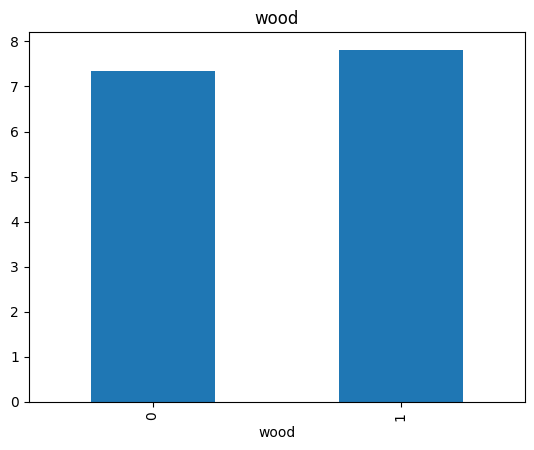

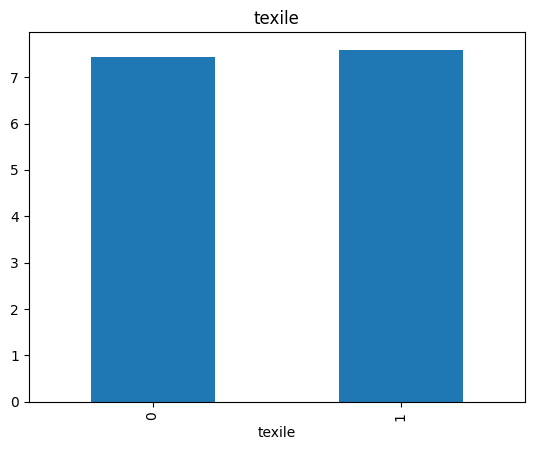

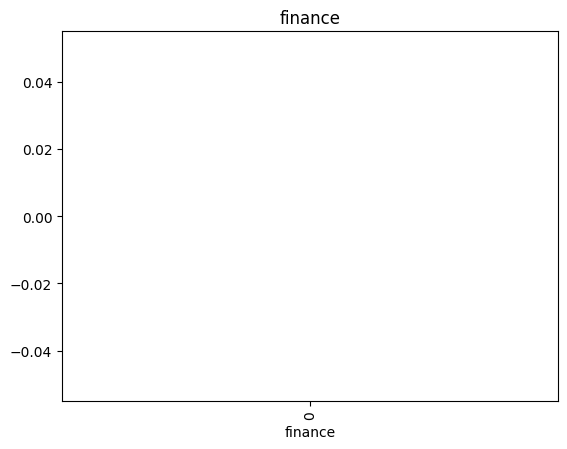

In [35]:
for feature in ts_null_mean.columns:
    ts_null_mean[feature]=np.where(ts_null_mean[feature].isnull(), 1, 0)

    ts_null_mean.groupby(feature)['finance'].mean().plot.bar()
    plt.title(feature)
    plt.show()

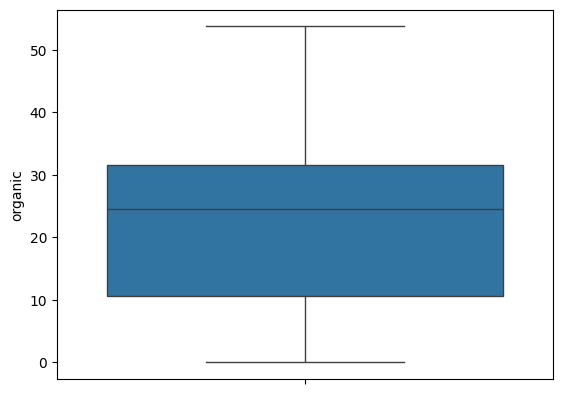

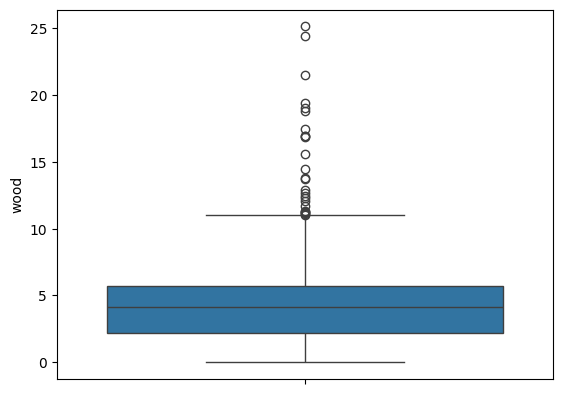

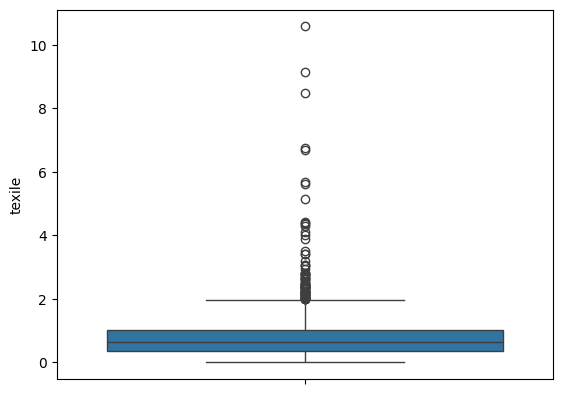

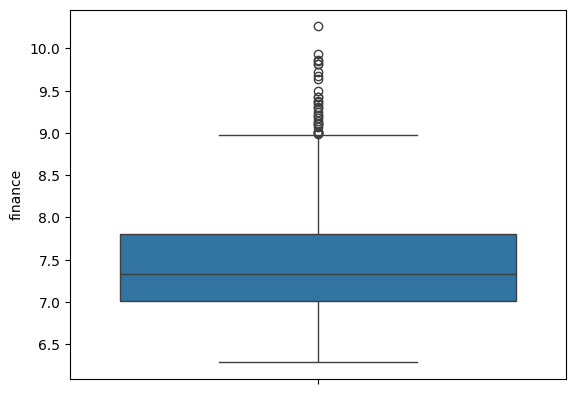

In [36]:
#box plot for training set:
for column in tr_null.columns:

    sns.boxplot(tr_null[column])
    plt.show()

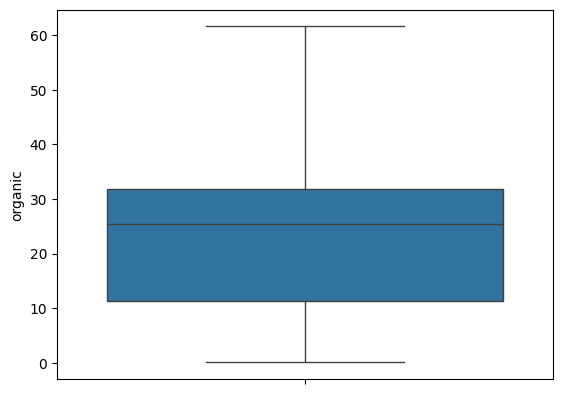

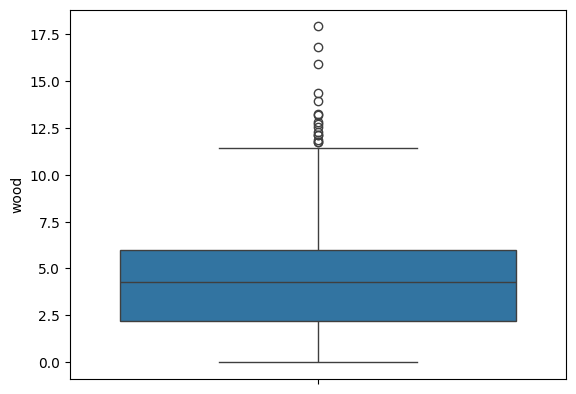

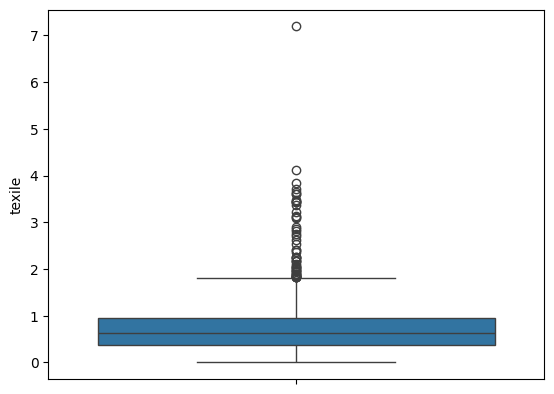

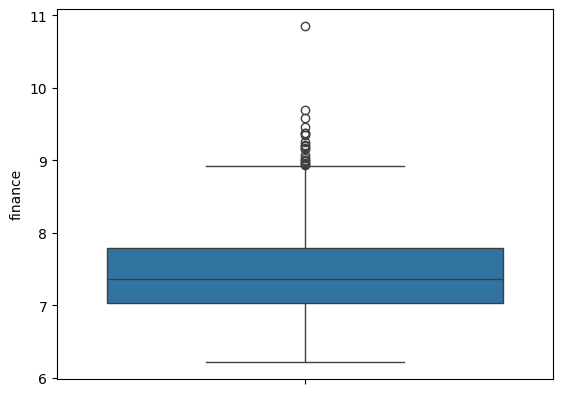

In [37]:
#box plot for test set:
for column in ts_null.columns:

    sns.boxplot(ts_null[column])
    plt.show()

As we can see from the above bar plot for 'organic', 'wood' and 'texile' that the mean and median value of the dependent column i.e finance with respect to the missing(NaN) and present data points are almost same so NaN value should be replaced with some nonzero value.

Its clear from the box plot that the data have many outlier points so it may be a better to choice to replace the missing value with the median of the present value.

We are going to use two model one with median replaced and other with decarding the columns.


In [38]:
#median, minimum and maximum value in features having null value greater than 200.
##training
for feature in xu4_train.columns:
  if xu4_train[feature].isnull().sum()>200:
     print('median of ',feature,'is',xu4_train[feature].median(axis=0, skipna=True))
     print('minimum of ',feature,'is',xu4_train[feature].min(axis=0, skipna=True))
     print('maximum of ',feature,'is',xu4_train[feature].max(axis=0, skipna=True))

median of  organic is 24.60607175630409
minimum of  organic is 0.0251323142426303
maximum of  organic is 53.78344135463722
median of  wood is 4.129098363262408
minimum of  wood is 7.96919809307e-09
maximum of  wood is 25.11700170233176
median of  texile is 0.6436549999274012
minimum of  texile is 1.08057875798e-06
maximum of  texile is 10.58447187895521


In [39]:
#filling of Nan value with median in the training set.
xu5_train=xu4_train.copy()
for feature in xu5_train.columns:
  if xu5_train[feature].isnull().sum()>200:
    med_val=xu5_train[feature].median(axis=0,skipna=True)
    xu5_train[feature].fillna(value=med_val,axis=0,inplace=True)


In [40]:
#median, minimum and maximum value in features having null value greater than 100.
##test
for feature in xu4_test.columns:
  if xu4_test[feature].isnull().sum()>100:
     print('median of ',feature,'is',xu4_test[feature].median(axis=0, skipna=True))
     print('minimum of ',feature,'is',xu4_test[feature].min(axis=0, skipna=True))
     print('maximum of ',feature,'is',xu4_test[feature].max(axis=0, skipna=True))

median of  organic is 25.476568812054214
minimum of  organic is 0.0578851181530919
maximum of  organic is 61.63912210305654
median of  wood is 4.261590378699516
minimum of  wood is 1.01663899149e-05
maximum of  wood is 17.8999166726591
median of  texile is 0.6226384944446838
minimum of  texile is 1.24050240347e-06
maximum of  texile is 7.194323623742366


In [41]:
#feeling of Nan value with median in the test set.
xu5_test=xu4_test.copy()
for feature in xu5_test.columns:
  if xu5_test[feature].isnull().sum()>100:
    med_val=xu5_test[feature].median(axis=0,skipna=True)
    xu5_test[feature].fillna(value=med_val,axis=0,inplace=True)

In [42]:
#confirmation for no NaN value
print('NaN count in training set','\n',xu5_train.isnull().sum())
print('NaN count in test set','\n',xu5_test.isnull().sum())

NaN count in training set 
 Abruzzo                  0
Basilicata               0
Calabria                 0
Campania                 0
Emilia_Romagna           0
Friuli_Venezia_Giulia    0
Lazio                    0
Liguria                  0
Lombardia                0
Marche                   0
Molise                   0
Puglia                   0
Sardegna                 0
Sicilia                  0
Toscana                  0
Trentino_Alto_Adige      0
Umbria                   0
Valle_d'Aosta            0
Veneto                   0
piemonte                 0
province                 0
tc                       0
cres                     0
csor                     0
istat                    0
area                     0
pop                      0
alt                      0
isle                     0
sea                      0
pden                     0
wden                     0
urb                      0
PAYT                     0
STANDARD                 0
d_fee                    0


In [43]:
#Droping of citycode
##training set:
xu6_train=xu5_train.drop('istat',axis=1)
##test set:
xu6_test=xu5_test.drop('istat',axis=1)

In [44]:
#Find pairwise correlation of columns in the training data of independent features.
corr_xu6train=xu6_train.corr(method='pearson')
corr_xu6train

,Abruzzo,Basilicata,Calabria,Campania,Emilia_Romagna,Friuli_Venezia_Giulia,Lazio,Liguria,Lombardia,Marche,Molise,Puglia,Sardegna,Sicilia,Toscana,Trentino_Alto_Adige,Umbria,Valle_d'Aosta,Veneto,piemonte,province,tc,cres,csor,area,pop,alt,isle,sea,pden,wden,urb,PAYT,STANDARD,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage
Abruzzo,1.000000,-0.022452,-0.035710,-0.059064,-0.052439,-0.042473,-0.038428,-0.039643,-0.121551,-0.029425,-0.023836,-0.031573,-0.019733,-0.039299,-0.044226,-0.035523,-0.019079,NaN,-0.048754,-0.031154,0.180364,0.038333,0.045770,0.082944,0.020398,-0.011602,0.172964,-0.010590,0.010398,-0.062654,-0.064781,0.098028,-0.059838,0.059838,-0.059838,-0.217176,0.027308,-0.029197,0.058351,-0.125139,-0.115335,-0.026396,-0.014664,0.008041,-0.016291,-0.014364,-0.008339,-0.011291,-0.023265,-0.276579,0.010861,-0.261516,0.153723,0.118002,-0.153677,-0.109504
Basilicata,-0.022452,1.000000,-0.023321,-0.038573,-0.034246,-0.027738,-0.025096,-0.025889,-0.079381,-0.019217,-0.015566,-0.020620,-0.012887,-0.025665,-0.028882,-0.023199,-0.012460,NaN,-0.031840,-0.020346,0.122092,-0.015638,0.040877,-0.033441,0.117273,-0.007073,0.151773,-0.006916,-0.037285,-0.054386,-0.058706,0.062471,-0.046895,0.046895,-0.046895,-0.141830,0.011348,-0.044203,0.006278,-0.127669,-0.037565,-0.043937,-0.027329,0.037135,-0.112065,-0.014883,-0.004267,-0.009269,-0.147540,-0.180624,0.029488,-0.128922,0.075444,0.079878,-0.101064,-0.125921
Calabria,-0.035710,-0.023321,1.000000,-0.061350,-0.054469,-0.044117,-0.039916,-0.041177,-0.126256,-0.030564,-0.024759,-0.032796,-0.020497,-0.040820,-0.045938,-0.036898,-0.019817,NaN,-0.050641,-0.032360,0.133492,-0.067146,0.023708,-0.059403,0.013729,-0.007753,0.086828,-0.011000,0.135347,-0.057301,-0.070697,0.064316,-0.074586,0.074586,-0.074586,-0.225582,0.003280,0.073213,-0.089464,-0.071501,-0.139645,-0.123780,-0.006390,-0.037626,-0.099969,-0.020131,-0.005396,-0.012332,-0.143472,-0.287284,0.028191,-0.202355,0.335760,0.087336,-0.118039,-0.319385
Campania,-0.059064,-0.038573,-0.061350,1.000000,-0.090090,-0.072969,-0.066020,-0.068107,-0.208825,-0.050553,-0.040950,-0.054243,-0.033901,-0.067516,-0.075980,-0.061028,-0.032778,NaN,-0.083760,-0.053523,0.443784,0.090961,0.066923,0.140392,-0.076773,0.028009,0.006275,0.025693,0.108547,0.233523,0.208099,-0.080364,-0.123364,0.123364,-0.123364,-0.373108,-0.055397,-0.218898,0.070822,-0.103115,-0.103952,0.264147,-0.086812,0.048292,-0.183096,0.005266,0.023326,0.015121,-0.057051,-0.475163,-0.009968,0.117722,-0.238067,0.290343,0.062884,-0.437737
Emilia_Romagna,-0.052439,-0.034246,-0.054469,-0.090090,1.000000,-0.064783,-0.058614,-0.060467,-0.185401,-0.044882,-0.036357,-0.048159,-0.030099,-0.059943,-0.067457,-0.054183,-0.029101,NaN,-0.074364,-0.047520,-0.069963,0.064549,-0.005800,0.099442,0.141655,0.003823,-0.077860,-0.016153,-0.065660,-0.077402,-0.044935,0.065094,0.099400,-0.099400,0.099400,0.241458,-0.060950,-0.009534,-0.146558,0.151059,-0.069158,-0.056359,-0.028085,-0.100152,-0.007017,0.035819,0.002691,0.017898,-0.015932,0.219739,0.041131,0.198925,-0.057213,-0.045773,-0.087675,0.200806
Friuli_Venezia_Giulia,-0.042473,-0.027738,-0.044117,-0.072969,-0.064783,1.000000,-0.047475,-0.048975,-0.150166,-0.036352,-0.029447,-0.039006,-0.024378,-0.048551,-0.054637,-0.043885,-0.023570,NaN,-0.060231,-0.038488,0.045114,-0.082308,-0.053795,0.026551,-0.015024,-0.011568,-0.134109,-0.013083,0.019570,-0.053850,-0.051555,0.054192,0.019727,-0.019727,0.019727,0.195570,0.097160,0.036775,0.025162,0.056339,0.035028,0.045587,0.072973,-0.077246,-0.118009,-0.011851,-0.009916,-0.010366,0.055467,0.177978,-0.020824,-0.067596,-0.157297,0.029515,-0.012625,0.147752
Lazio,-0.038428,-0.025096,-0.039916,-0.066020,-0.058614,-0.047475,1.000000,-0.044312,-0.135866,-0.032891,-0.026643,-0.035292,-0.022057,-0.043927,-0.049434,-0.039706,-0.021326,NaN,-0.054496,-0.034823,0.014285,0.045793,0.035784,0.048749,0.075277,0.085009,0.028020,-0.011837,-0.032885,-0.03

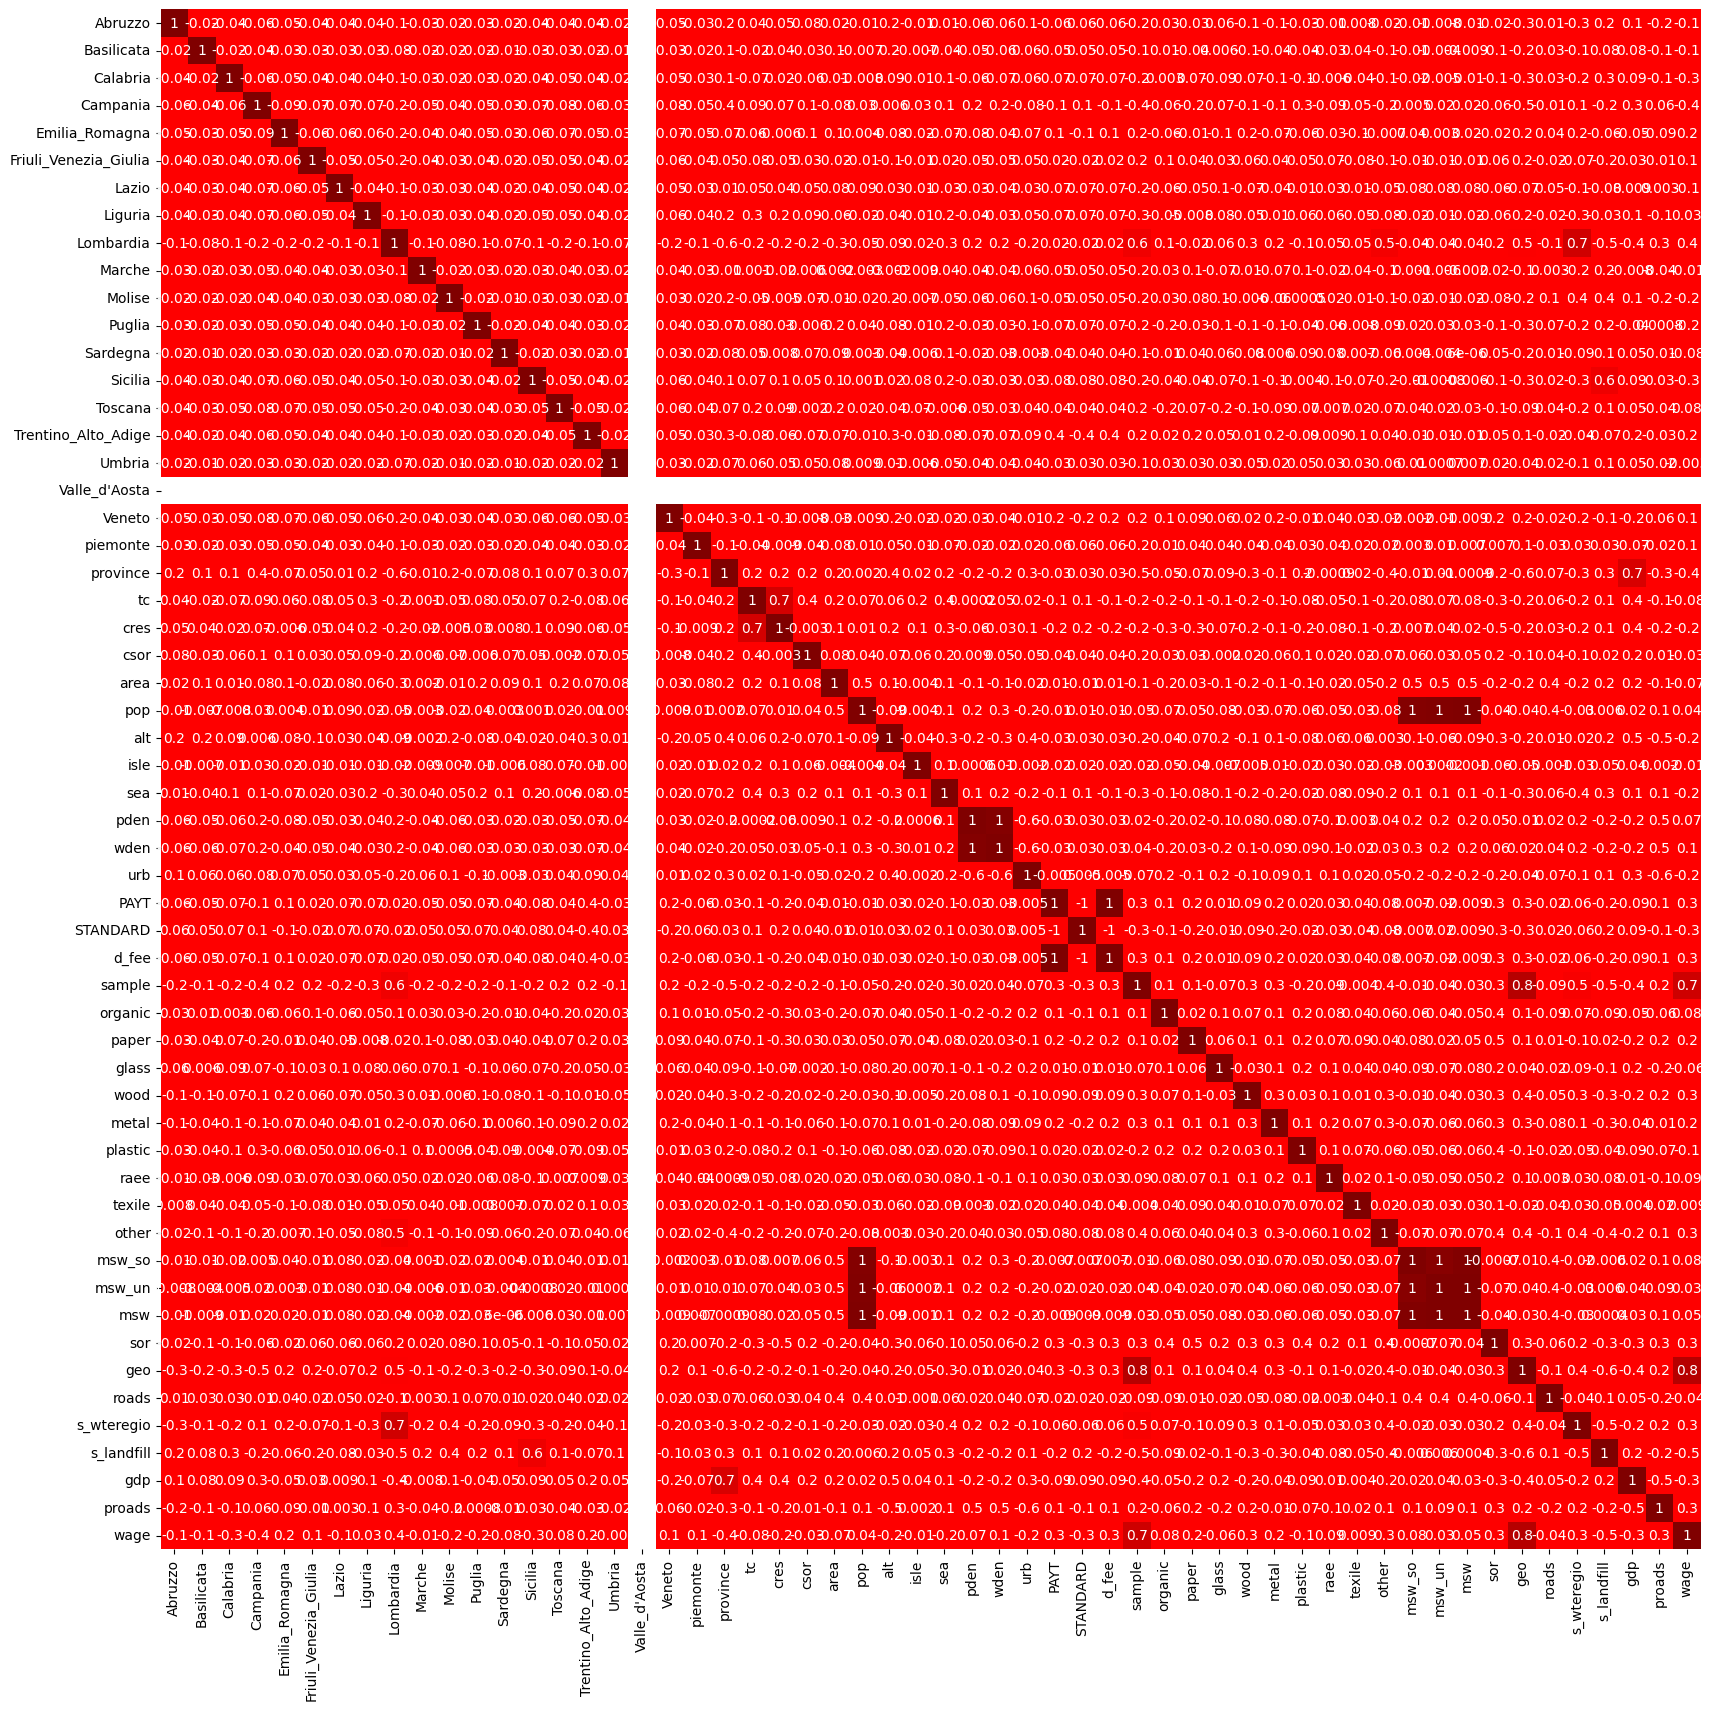

In [45]:
#plot of correlation matrix of xu6_train
fig1=plt.figure()
fig1.set_figwidth(25)
fig1.set_figheight(20)
sns.heatmap(corr_xu6train,vmin=0.50,vmax=1.00,center=0,annot=True,square=True,cmap= 'seismic',xticklabels=True, yticklabels=True,fmt='.1g',cbar=False)
plt.show()

In [46]:
#selecting features with corelation coefficient greater than 0.70
cor_thres=0.70
corelated=set()
for i in range(len(corr_xu6train)):
  for j in range(i):
    if corr_xu6train.iloc[i,j]>cor_thres:
       corelated.add(corr_xu6train.columns[i])
print(" Following are the highly correlated features:\n")
print(corelated)

 Following are the highly correlated features:

{'msw', 'geo', 'wden', 'wage', 'd_fee', 'msw_so', 'msw_un'}


In [47]:
#dropping of highly corelated features:
##training set:
xu7_train=xu6_train.drop(corelated,axis=1)
##test set:
xu7_test=xu6_test.drop(corelated,axis=1)

Testing and analysing for outliers:

In [48]:
#unique count in the training set:
xu7_train.nunique()

Abruzzo                     2
Basilicata                  2
Calabria                    2
Campania                    2
Emilia_Romagna              2
Friuli_Venezia_Giulia       2
Lazio                       2
Liguria                     2
Lombardia                   2
Marche                      2
Molise                      2
Puglia                      2
Sardegna                    2
Sicilia                     2
Toscana                     2
Trentino_Alto_Adige         2
Umbria                      2
Valle_d'Aosta               1
Veneto                      2
piemonte                    2
province                   98
tc                       2550
cres                     2362
csor                     2377
area                     2265
pop                      2437
alt                       807
isle                        2
sea                         2
pden                     2768
urb                         3
PAYT                        2
STANDARD                    2
sample    

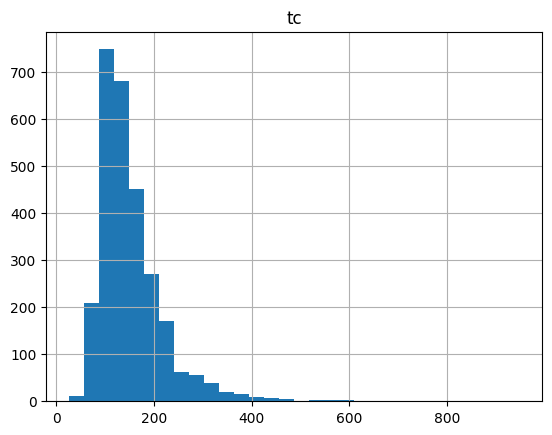

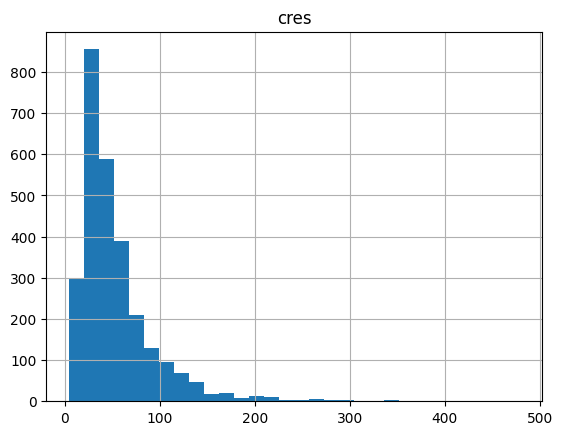

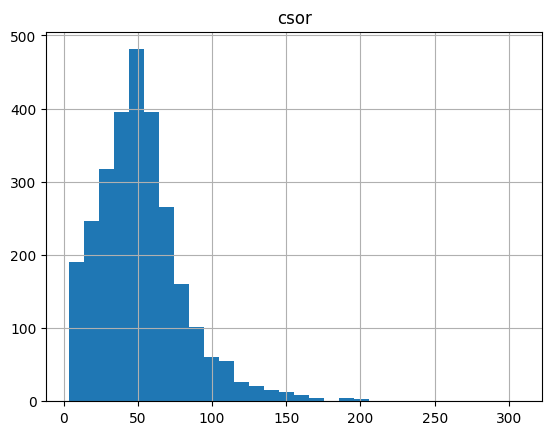

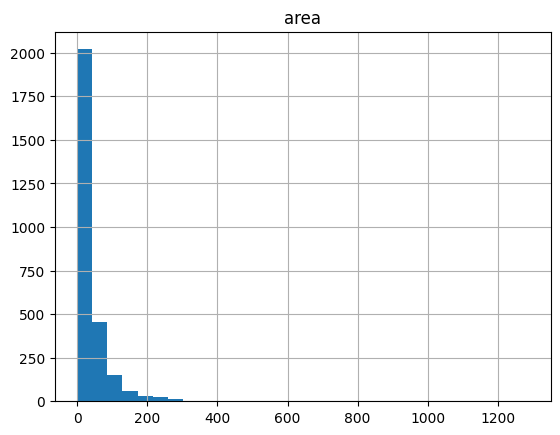

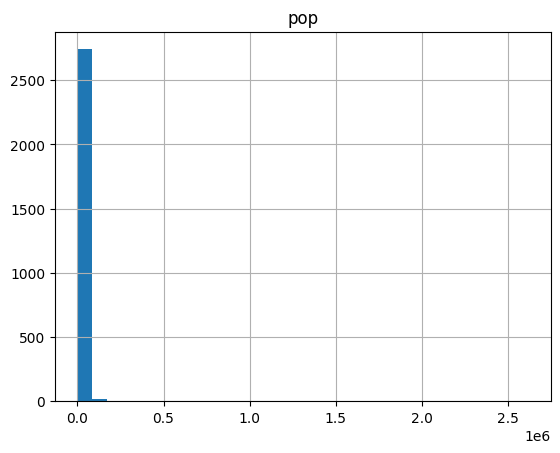

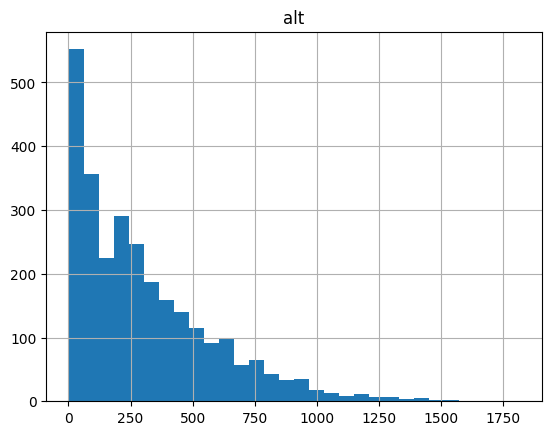

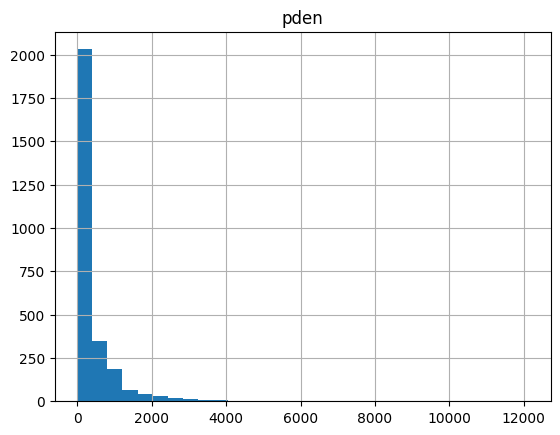

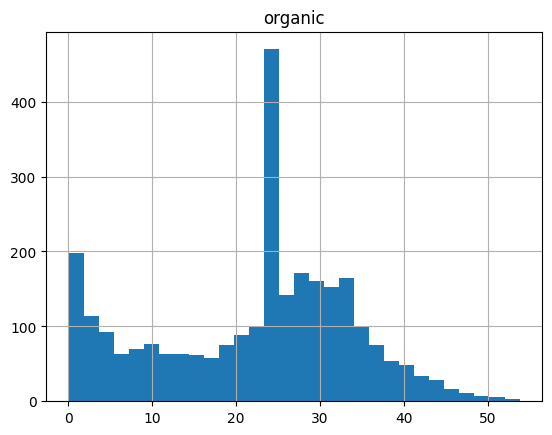

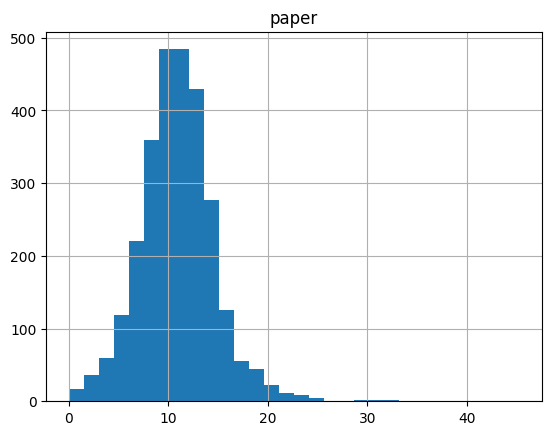

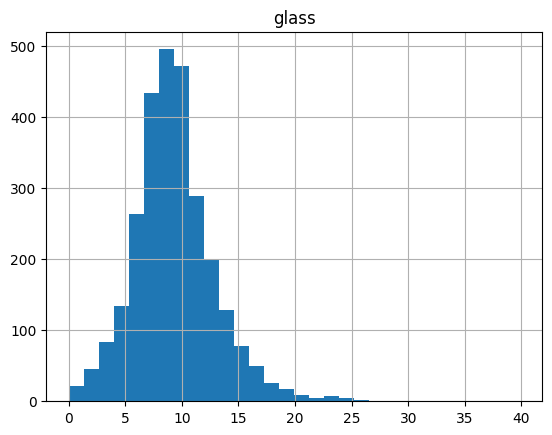

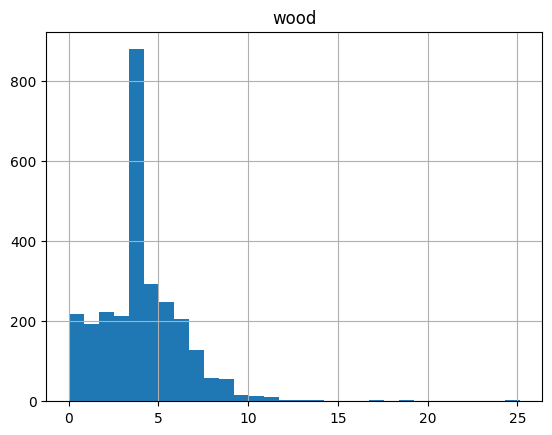

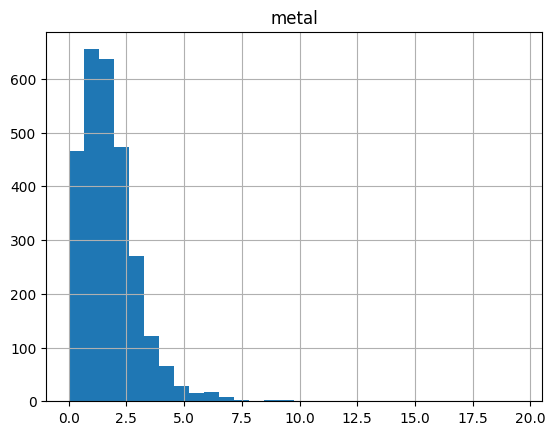

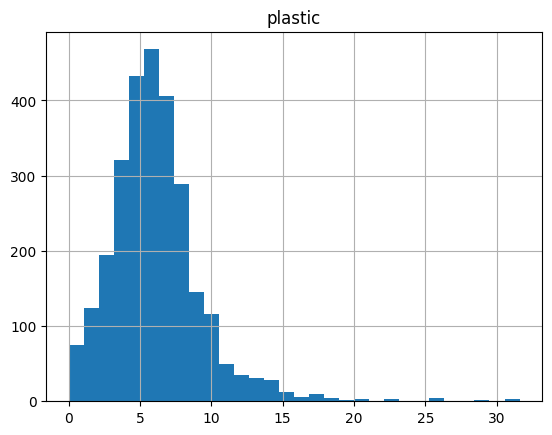

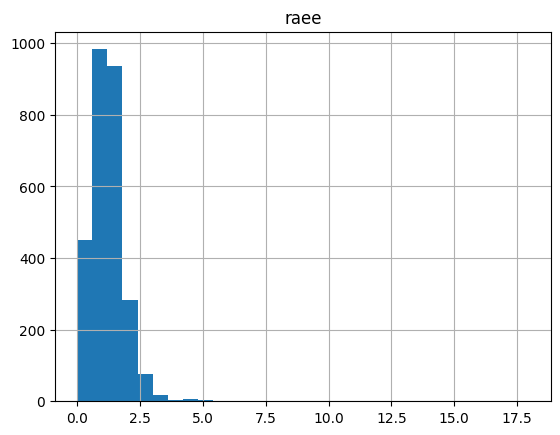

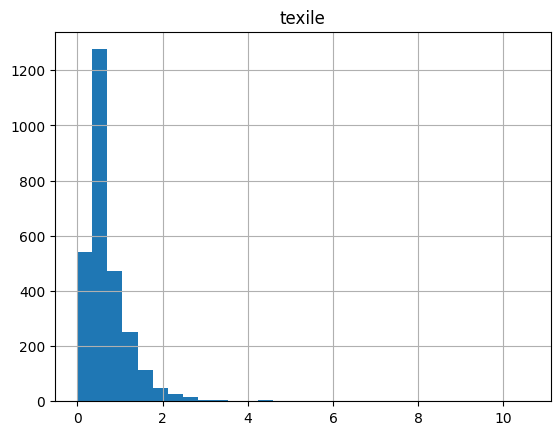

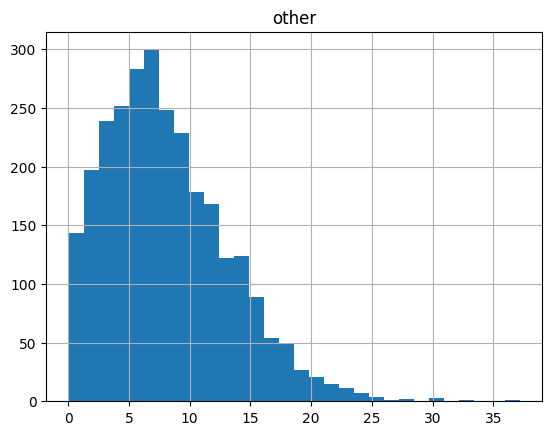

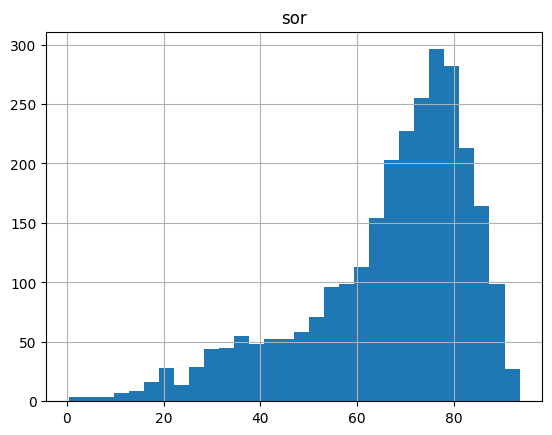

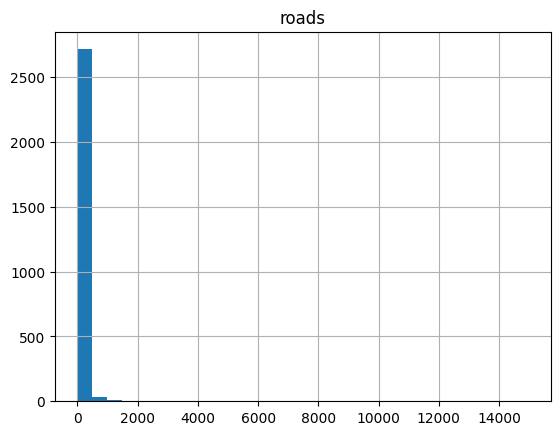

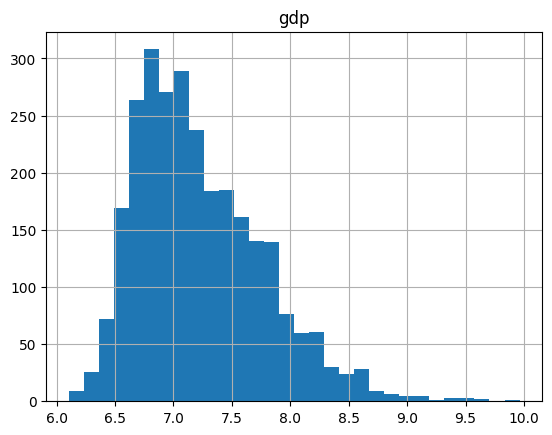

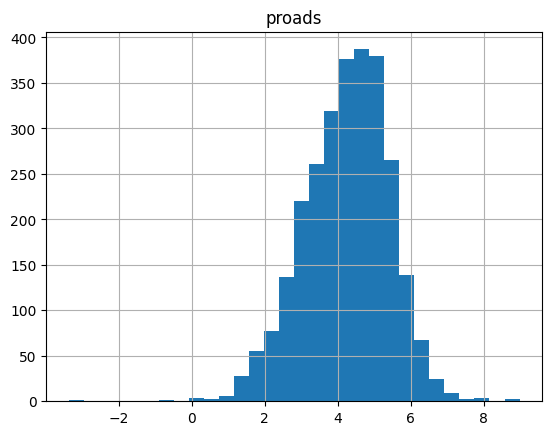

In [49]:
#plotting the histogram for the features having unique count greater than 100
for column in xu7_train.columns:
  if xu7_train[column].nunique()>100:
    xu7_train.hist(column,bins=30)

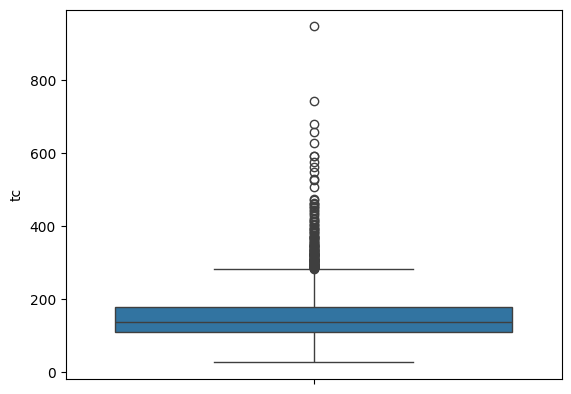

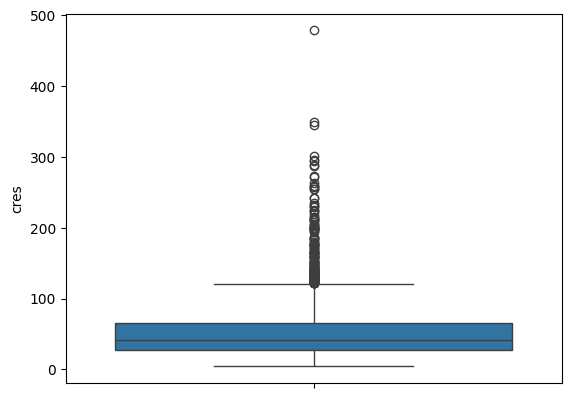

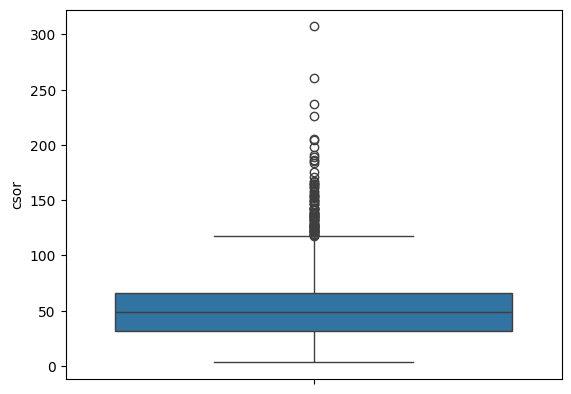

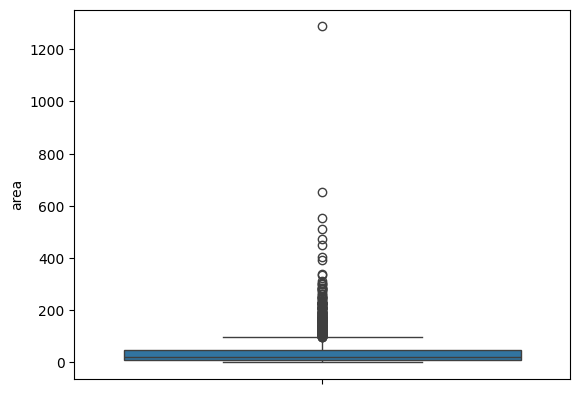

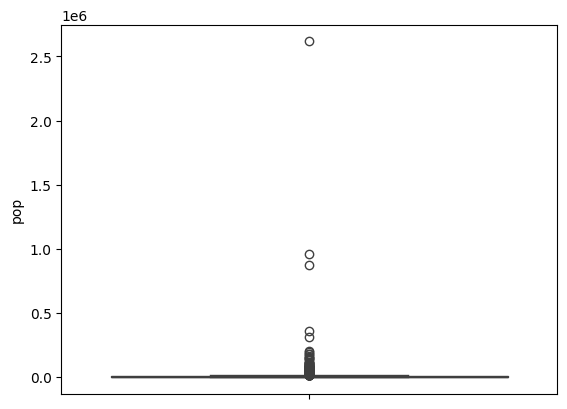

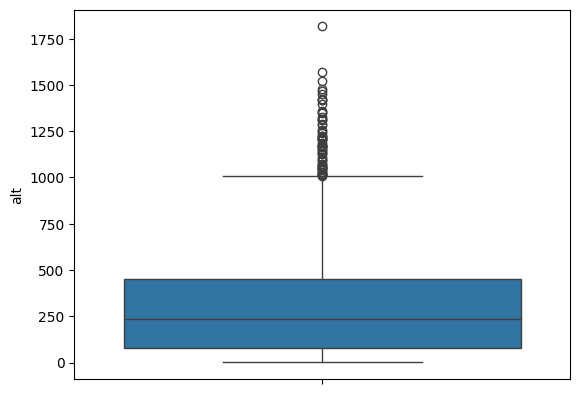

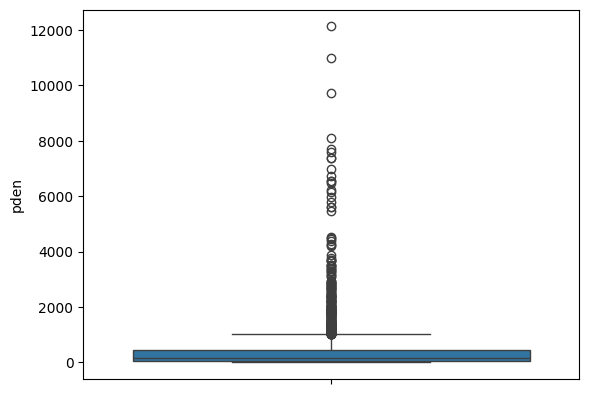

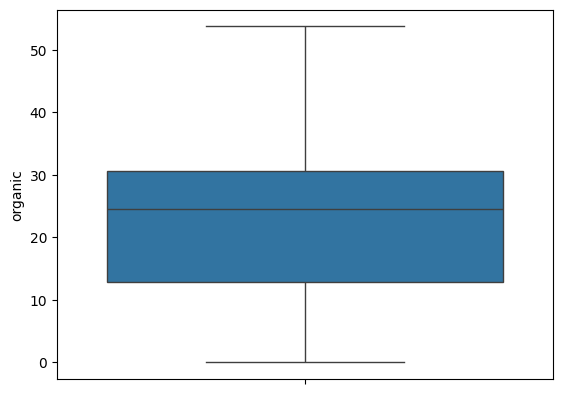

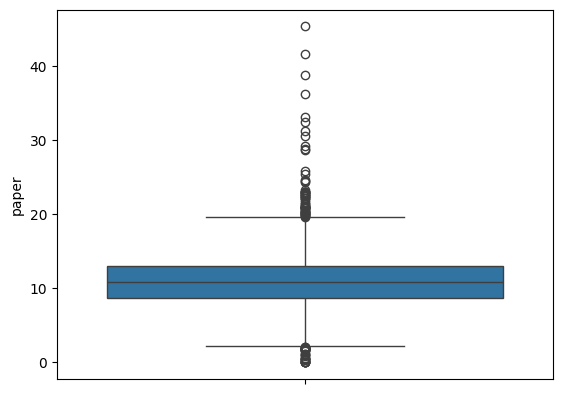

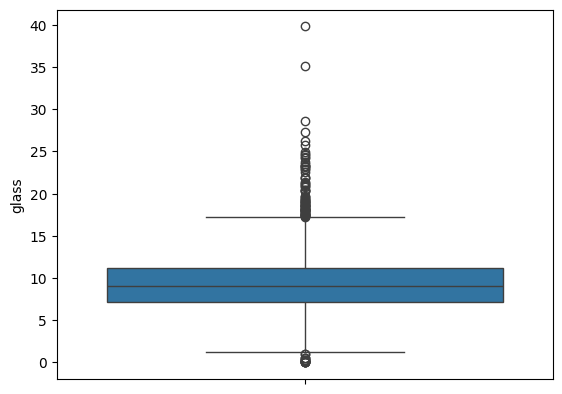

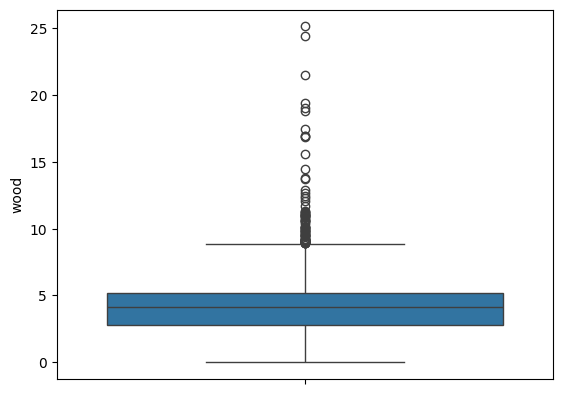

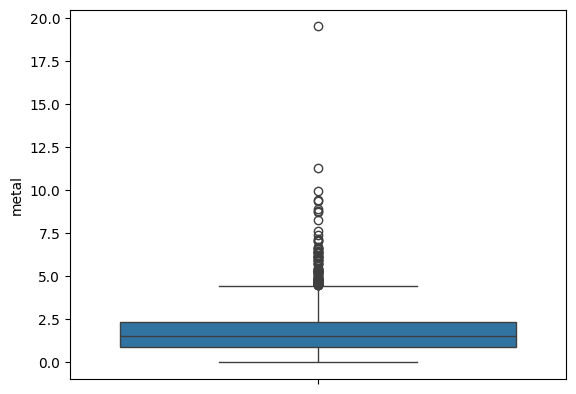

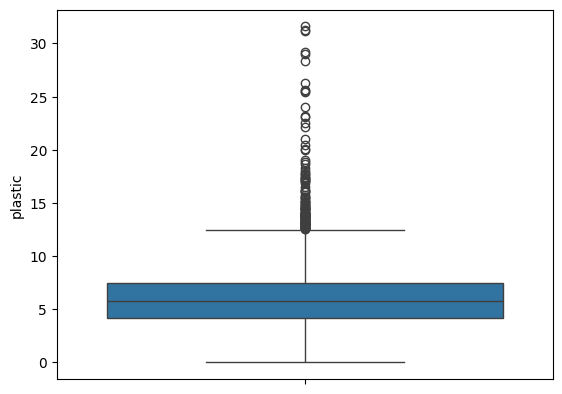

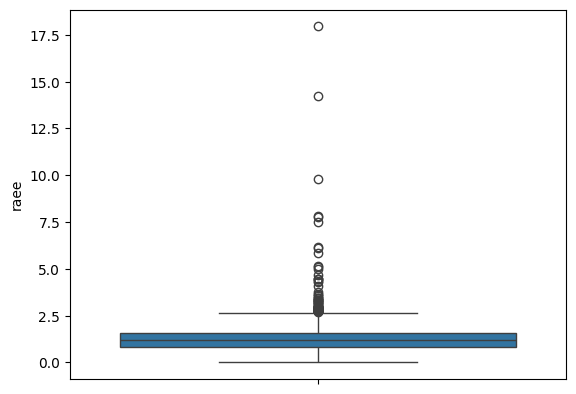

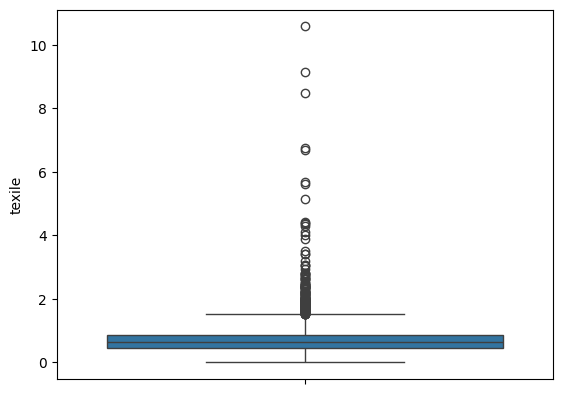

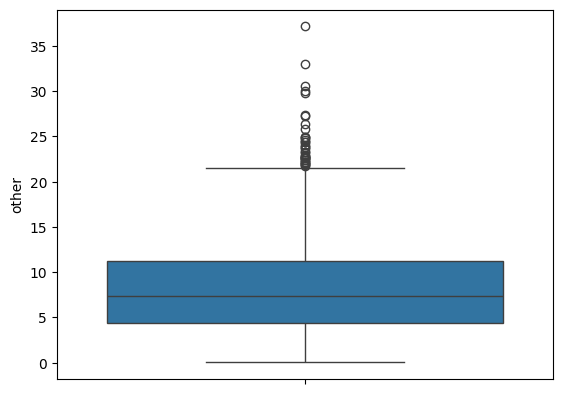

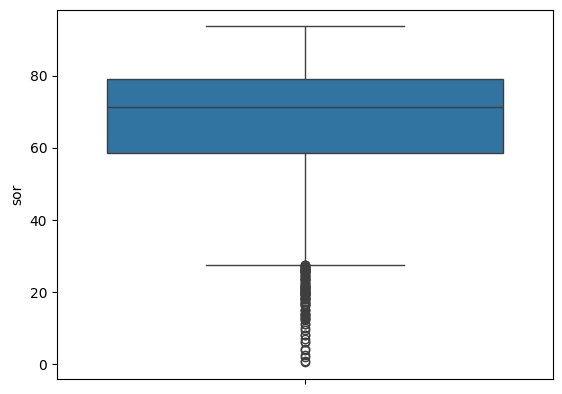

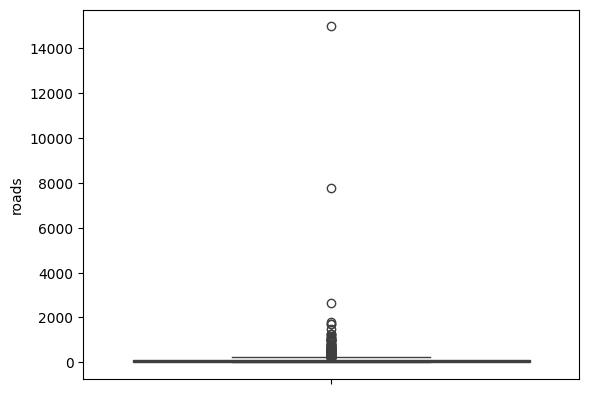

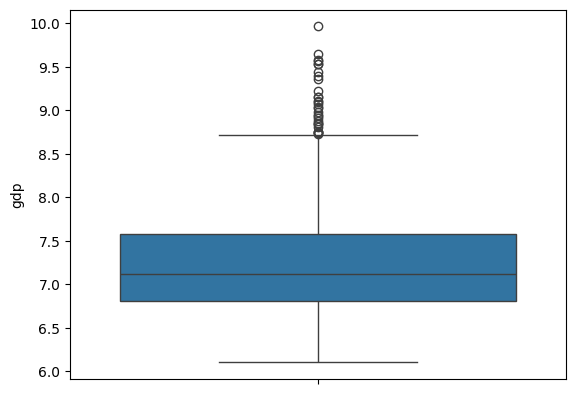

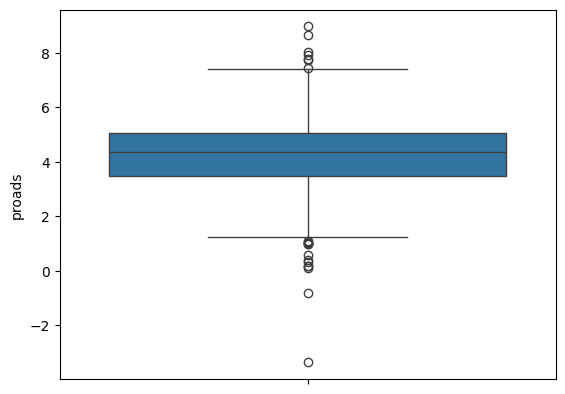

In [50]:
#plotting the boxplot for the features having unique count greater than 100
for column in xu7_train.columns:
  if xu7_train[column].nunique()>150:
    sns.boxplot(xu7_train[column])
    plt.show()

In [51]:
#### As it can be observed from the box plot that many points in the features shown above are lying outside the upper whisker and the lower\
#### whisker, but it can also be observed that these points are reasonable, means directly we can not treat them as outliers rather the data
#### have more variability.

*Transformation of training data so that it become more normally distributed:*

In [52]:
# Since most of the data are skewed first we have to make it bell shaped and then we will do feature scalling.

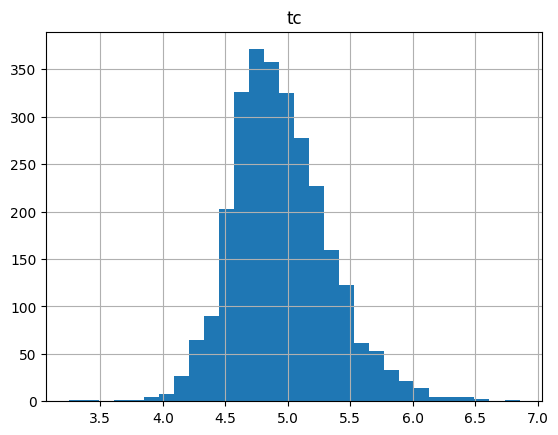

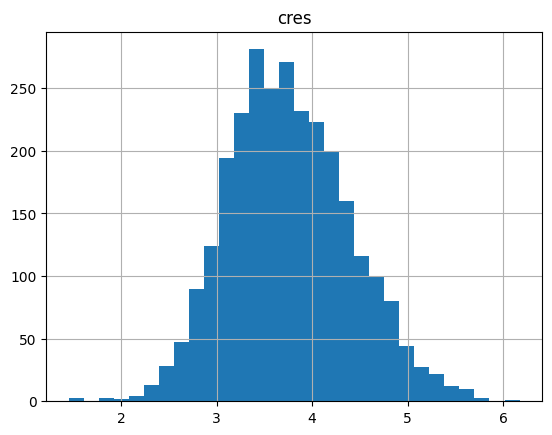

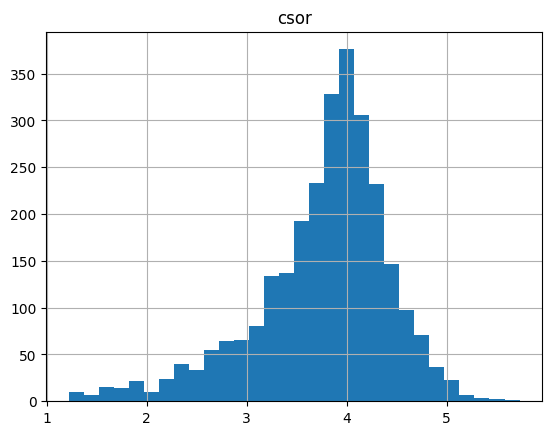

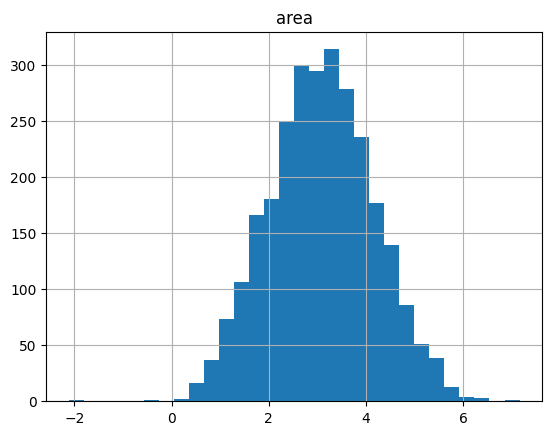

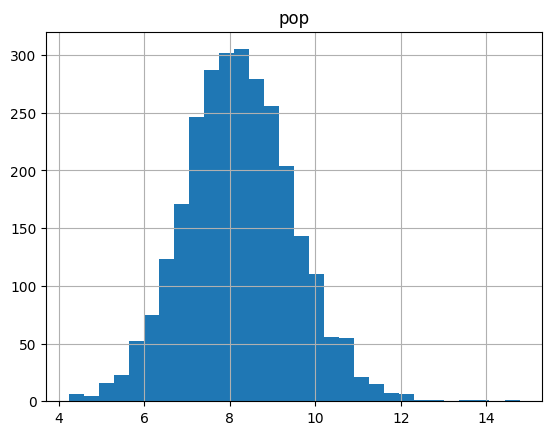

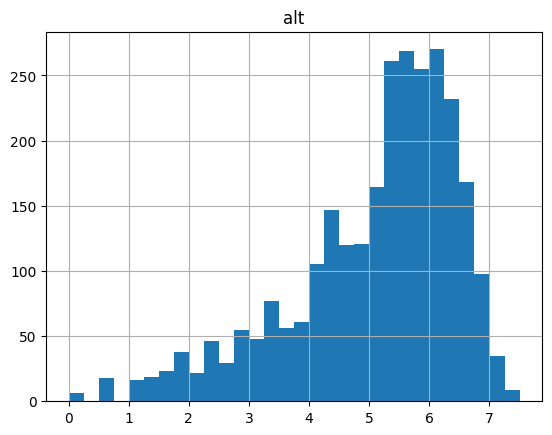

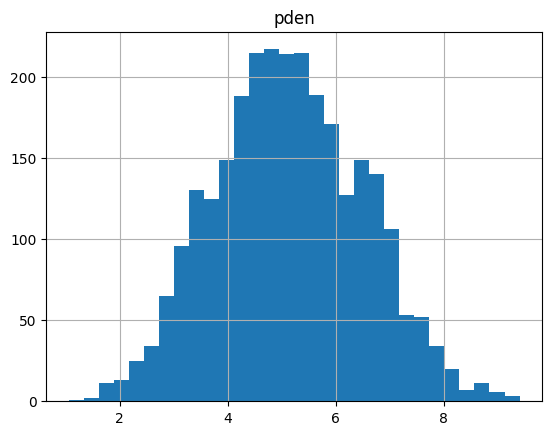

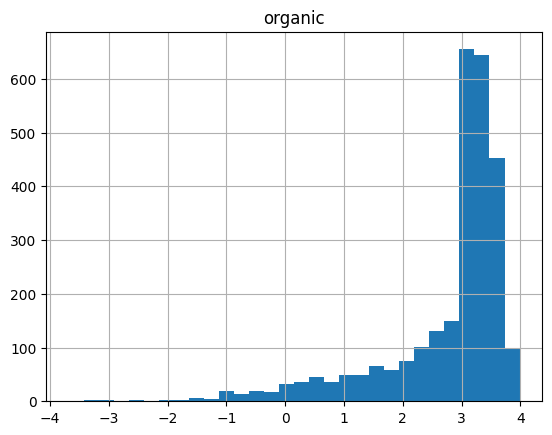

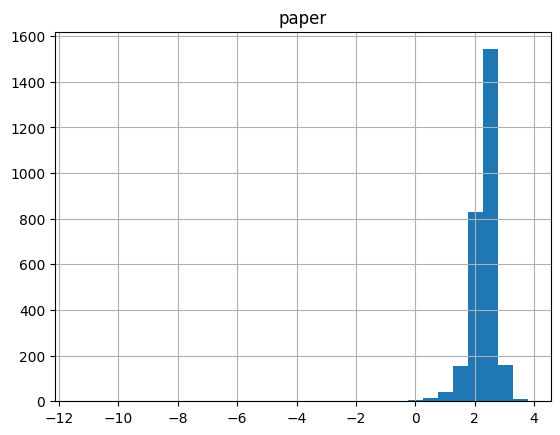

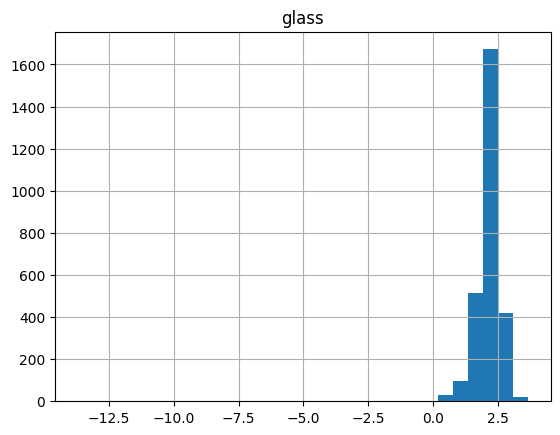

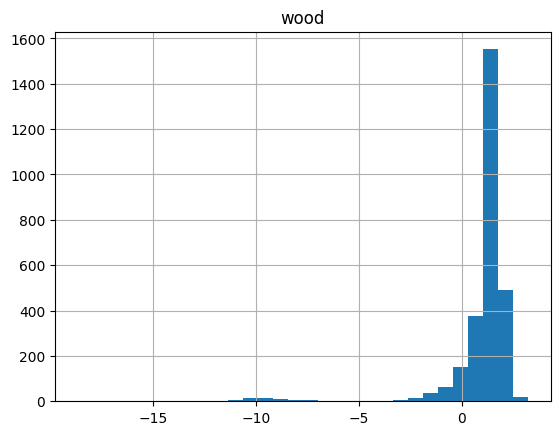

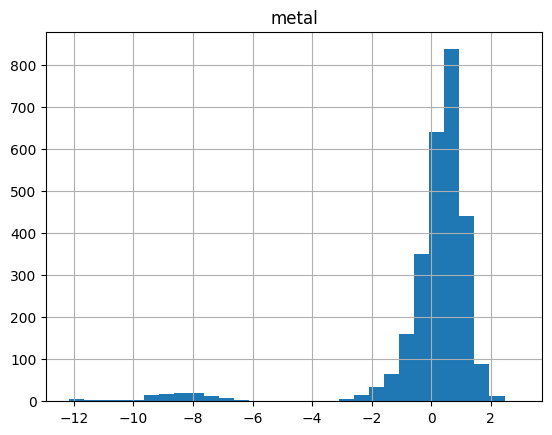

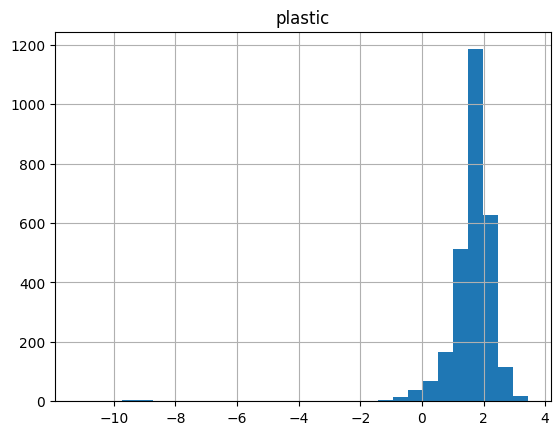

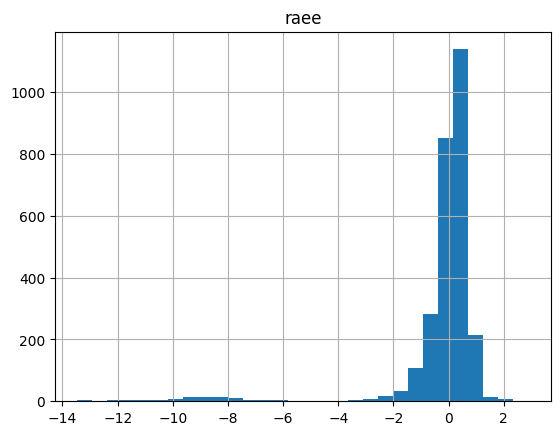

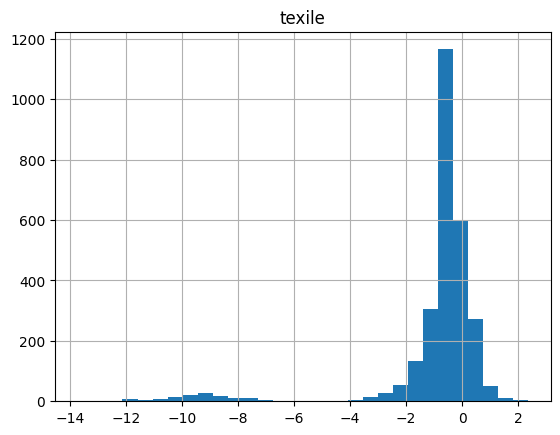

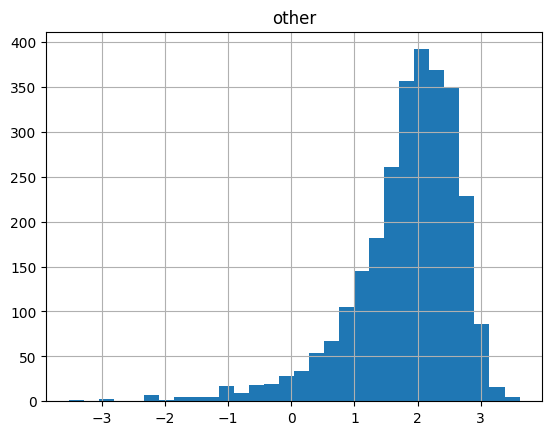

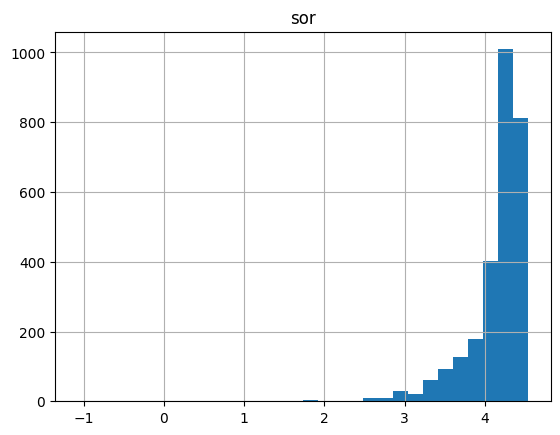

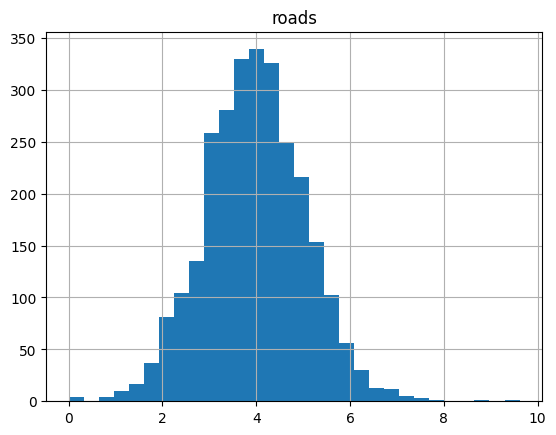

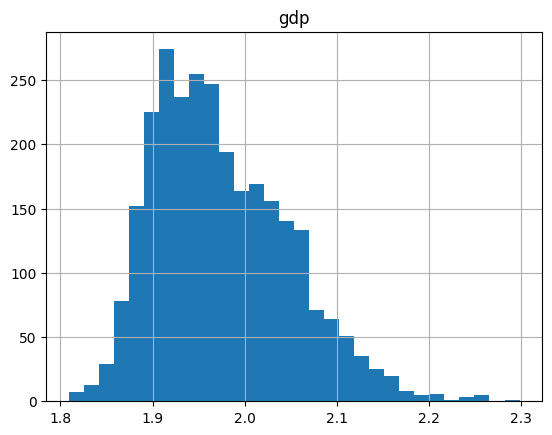

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


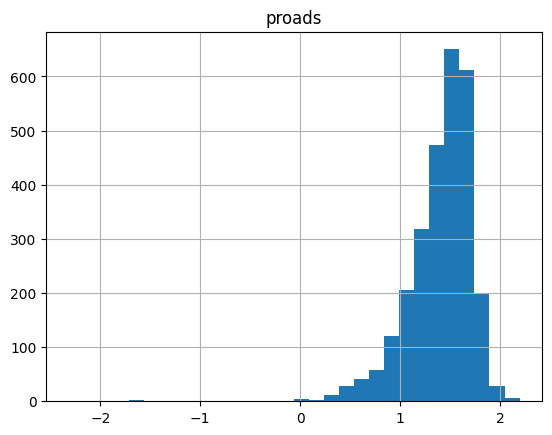

In [53]:
#checking the log transformation result
xu8=xu7_train.copy()
for column in xu8.columns:
  if xu8[column].nunique()>100:
    xu8[column]=np.log(xu8[column])
    xu8.hist(column,bins=30)
    plt.show()

array([[<Axes: title={'center': 'trs_wood'}>]], dtype=object)

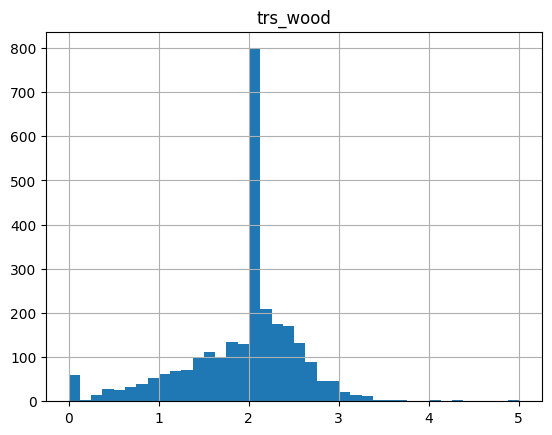

In [54]:
#checking the sqrt transformation result
xu9=xu7_train.copy()
xu9['trs_wood']=np.sqrt(xu9['wood'])
xu9.hist('trs_wood',bins=40)

array([[<Axes: title={'center': 'trs_metal'}>]], dtype=object)

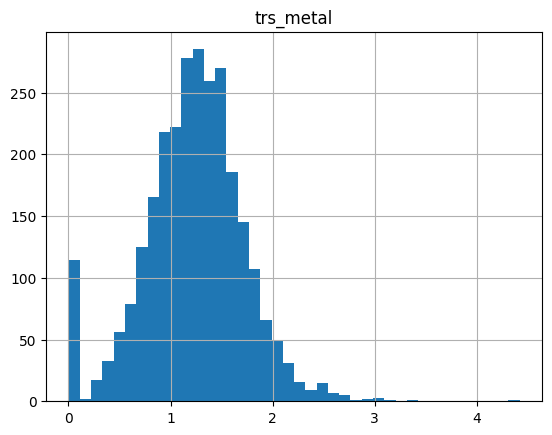

In [55]:
xu9['trs_metal']=np.sqrt(xu9['metal'])
xu9.hist('trs_metal',bins=40)

array([[<Axes: title={'center': 'trs_raee'}>]], dtype=object)

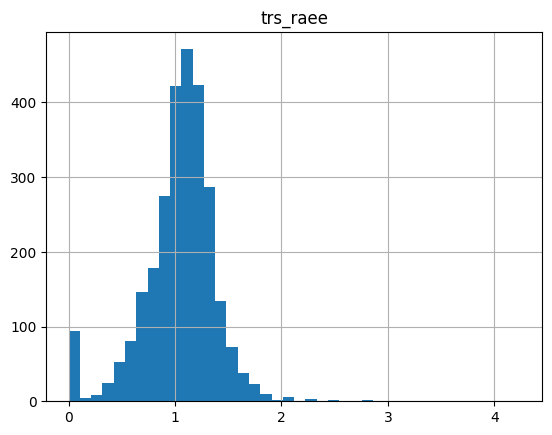

In [56]:
xu9['trs_raee']=np.sqrt(xu9['raee'])
xu9.hist('trs_raee',bins=40)

array([[<Axes: title={'center': 'trs_texile'}>]], dtype=object)

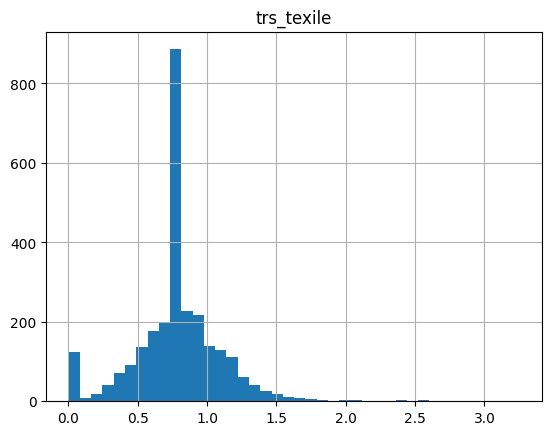

In [57]:
xu9['trs_texile']=np.sqrt(xu9['texile'])
xu9.hist('trs_texile',bins=40)

array([[<Axes: title={'center': 'trs_other'}>]], dtype=object)

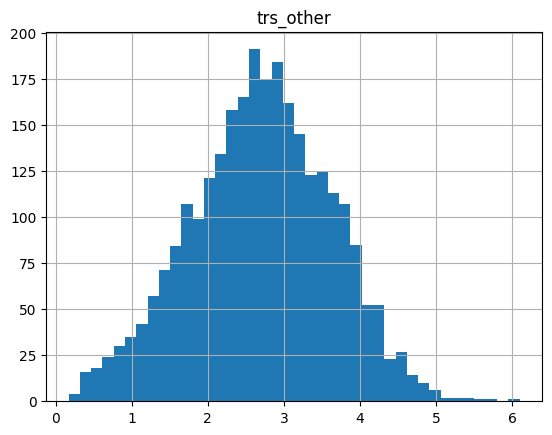

In [58]:
xu9['trs_other']=np.sqrt(xu9['other'])
xu9.hist('trs_other',bins=40)

array([[<Axes: title={'center': 'trs_sor'}>]], dtype=object)

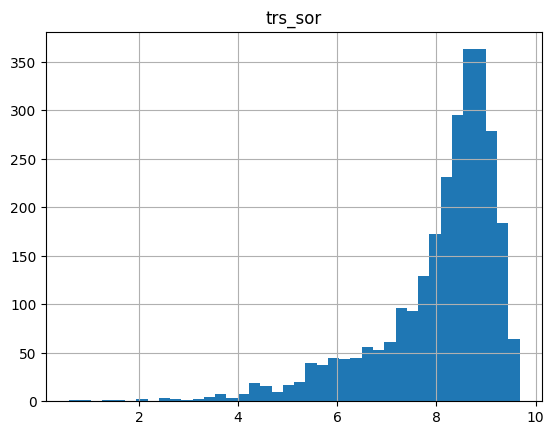

In [59]:
xu9['trs_sor']=np.sqrt(xu9['sor'])
xu9.hist('trs_sor',bins=40)

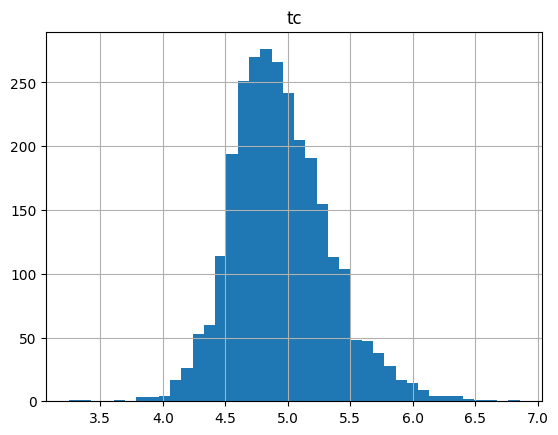

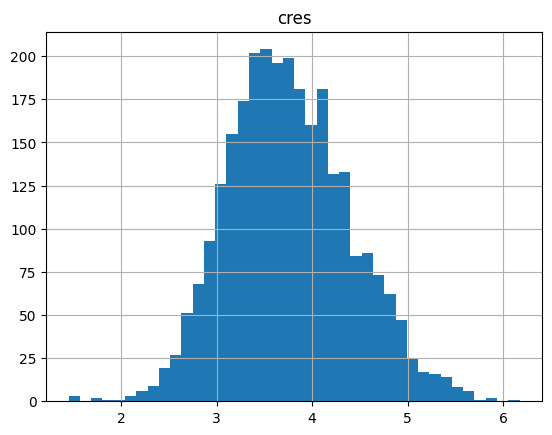

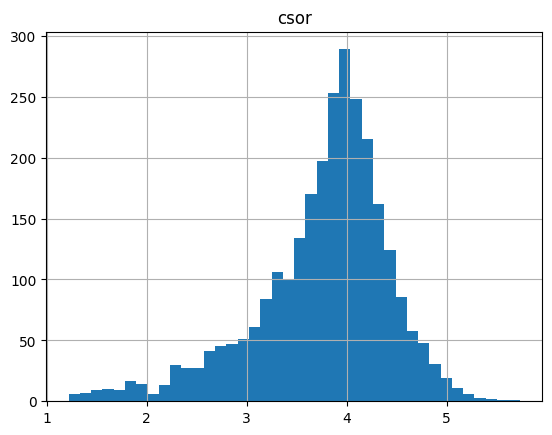

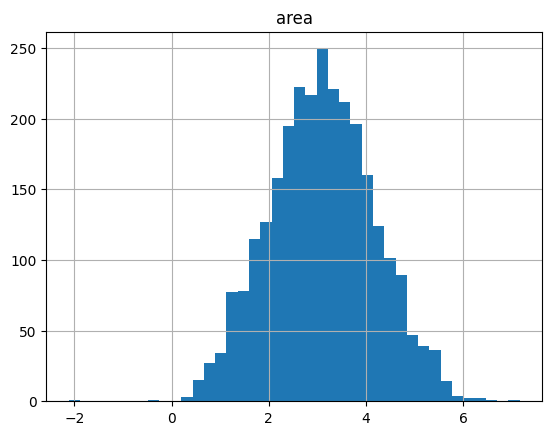

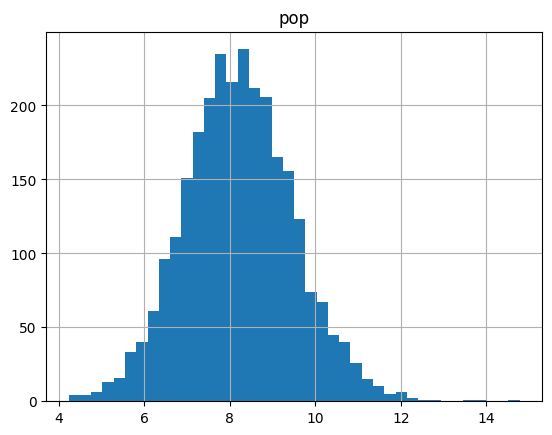

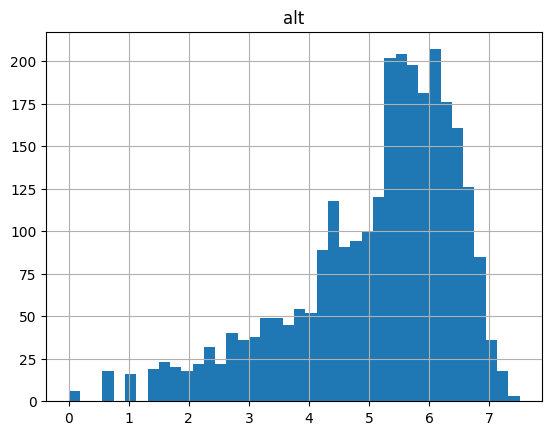

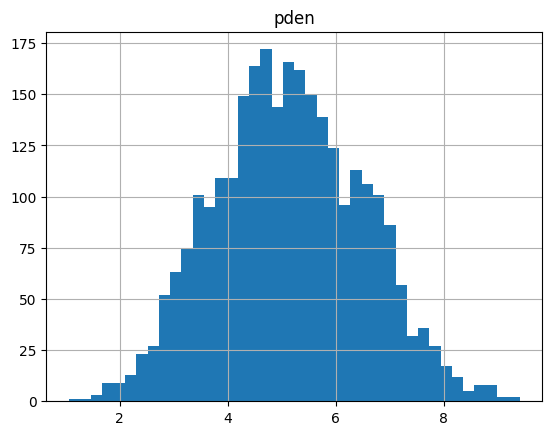

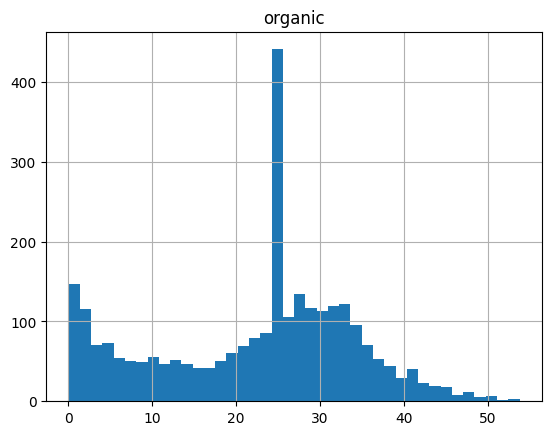

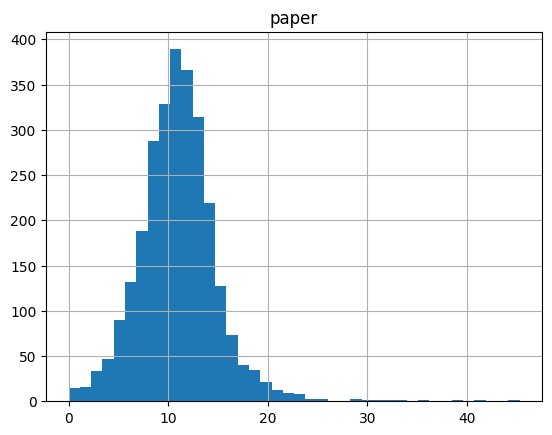

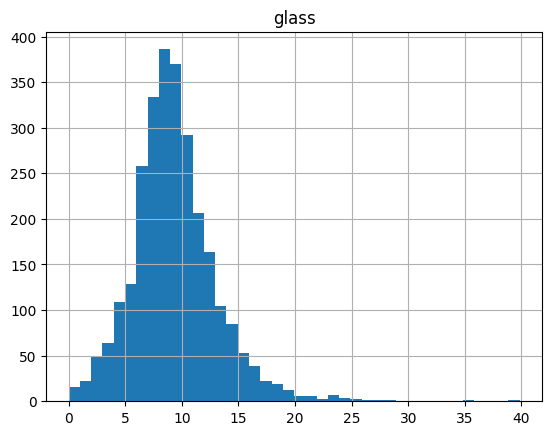

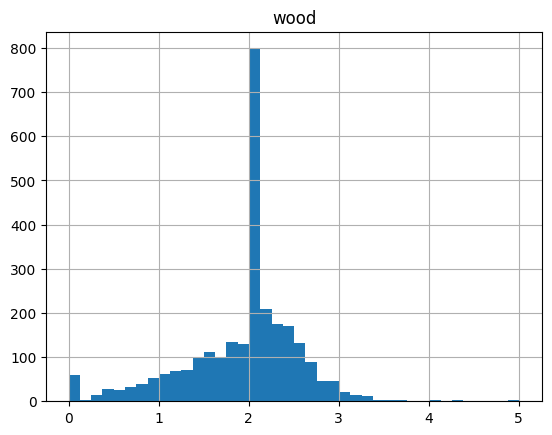

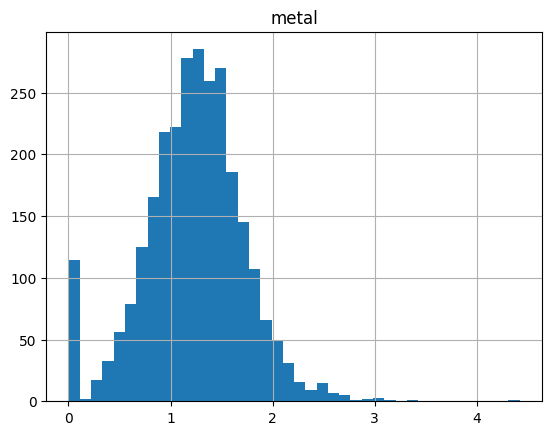

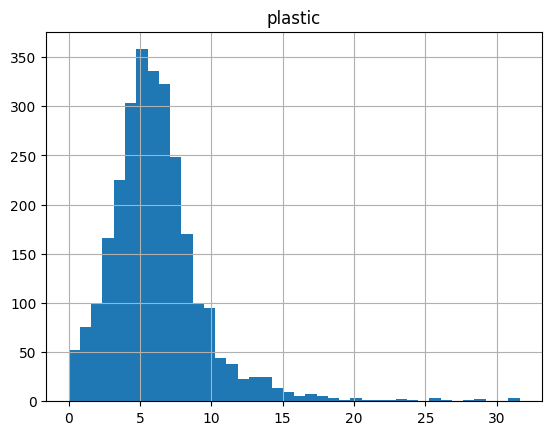

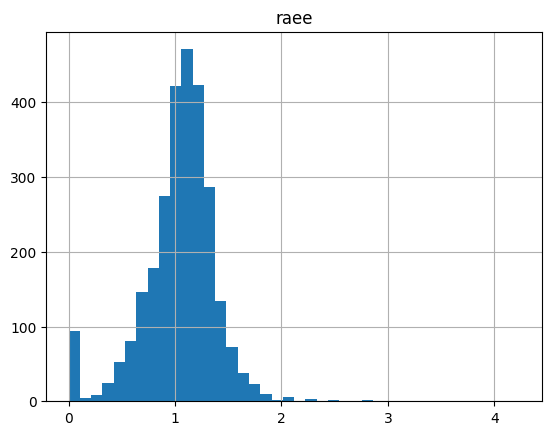

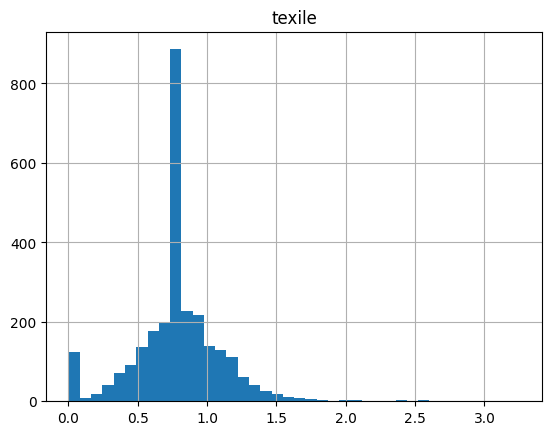

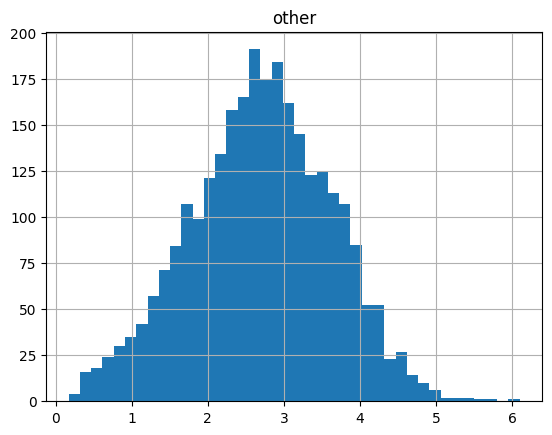

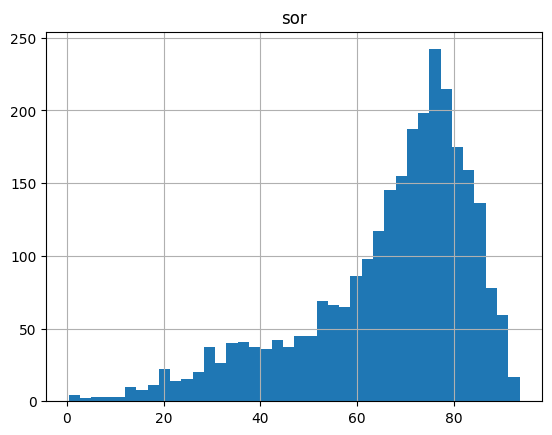

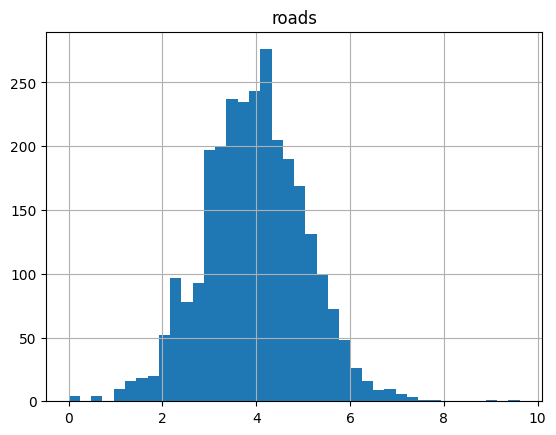

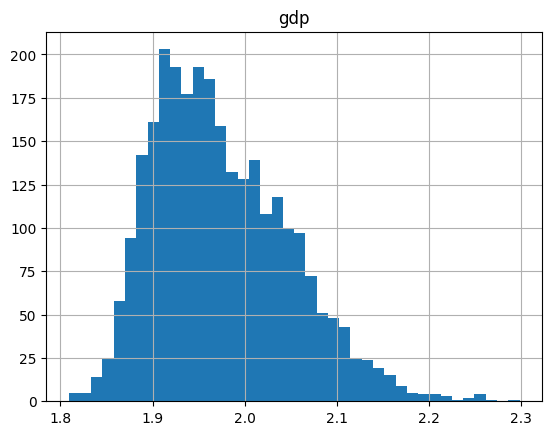

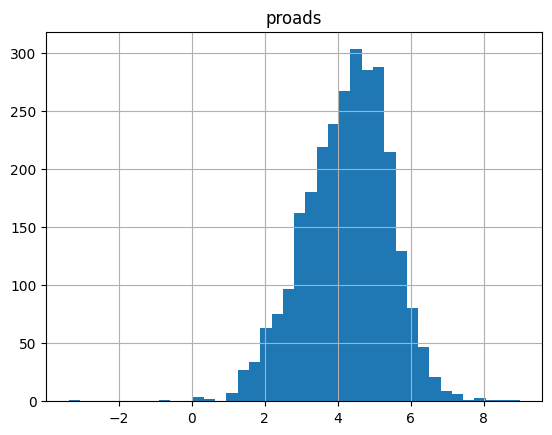

In [60]:
#### After analysing the data for various transformation result, below is the transformed data
## transformation of data to make it normally distributed:
#training data:
xu8_train=xu7_train.copy()
sqrt_transform=['wood','metal','raee','texile','other']
log_transform=['tc','cres','csor','area','pop','alt','pden','roads','gdp']
for column in log_transform:
  xu8_train[column]=np.log(xu8_train[column])
for column in sqrt_transform:
  xu8_train[column]=np.sqrt(xu8_train[column])

#Test data:
xu8_test=xu7_test.copy()
for column in log_transform:
  xu8_test[column]=np.log(xu8_test[column])
for column in sqrt_transform:
  xu8_test[column]=np.sqrt(xu8_test[column])

#plotting the histogram of transformed training set:
for column in xu8_train.columns:
  if xu8_train[column].nunique()>100:
    xu8_train.hist(column,bins=40)
    plt.show()

Standardization:

In [61]:
from sklearn.preprocessing import StandardScaler
xu9_train=xu8_train.copy()
xu9_test=xu8_test.copy()
scal=StandardScaler(copy=True)
xu9_train_scaled=scal.fit_transform(xu9_train)
xu9_test_scaled=scal.transform(xu9_test)


In [62]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(copy=True)
xu10_train=xu8_train.copy()
xu10_test=xu8_test.copy()
xu10_train_scaled=minmax.fit_transform(xu10_train)
xu10_test_scaled=minmax.transform(xu10_test)

###**Linear Regression**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [64]:

lreg=LinearRegression()
lreg.fit(xu9_train_scaled,yu4_train)
ylr_test_pred=lreg.predict(xu9_test_scaled)
ylr_train_pred=lreg.predict(xu9_train_scaled)
print('R2 score for Linear Regression for the train data: ',lreg.score(xu9_train_scaled,yu4_train))
print('mean squared error for Linear Regression for the train data: ',mean_squared_error(yu4_train,ylr_train_pred))
print('R2 score for Linear Regression for the test data: ',lreg.score(xu9_test_scaled,yu4_test))
print('mean squared error for Linear Regression for the test data: ',mean_squared_error(yu4_test,ylr_test_pred))

R2 score for Linear Regression for the train data:  0.9978453367487092
mean squared error for Linear Regression for the train data:  0.0006846766987581038
R2 score for Linear Regression for the test data:  -1.571968820016684e+21
mean squared error for Linear Regression for the test data:  5.156076578491312e+20


**Scatter plot of predicted vs true values**

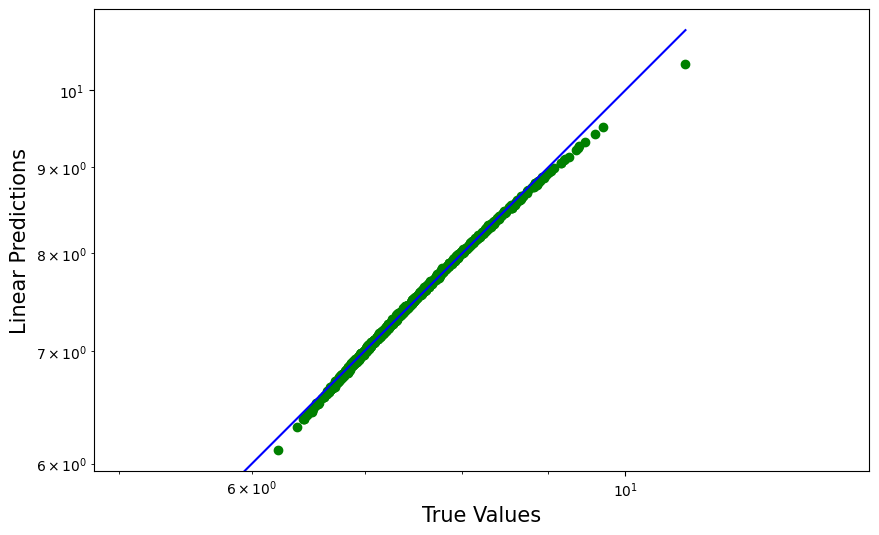

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(yu4_test,ylr_test_pred , c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(ylr_test_pred), max(yu4_test))
p2 = min(min(ylr_test_pred), min(yu4_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Linear Predictions', fontsize=15)
plt.axis('equal')
plt.show()

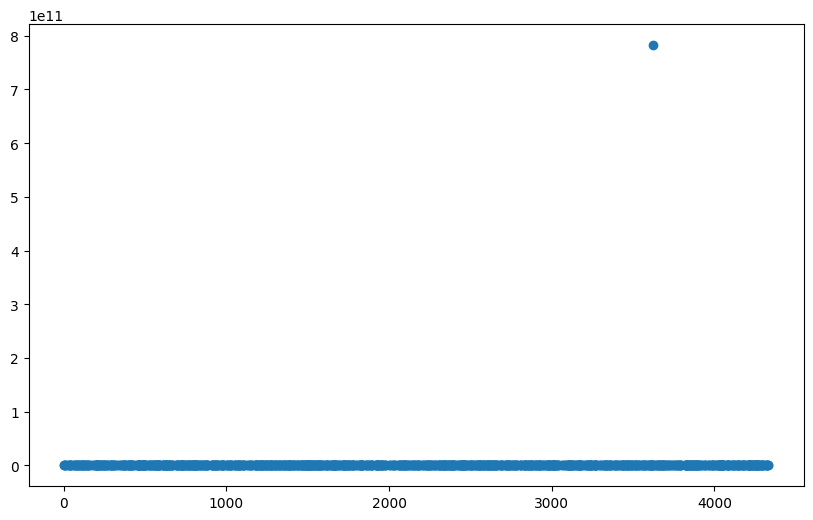

In [66]:
plt.figure(figsize=(10,6))
plt.plot(yu4_test-ylr_test_pred ,marker='o',linestyle='')

In [67]:
linear_coef = lreg.coef_
linear_coef = np.array(linear_coef)
print(np.sort(linear_coef))

#Some features are given relatively higher weight in comparison to other features(indicating the higher importance)
#but this much difference in the weights can lead to a considerable amount of error if the feature has an inbuilt error.

[-9.34888550e+10 -3.44224679e+10 -1.12204186e+10 -1.73050202e+04
 -2.78273838e-03 -2.70506247e-03 -2.63706461e-03 -1.04747893e-03
 -9.57970291e-04 -4.64887672e-04 -3.27088922e-04 -1.39098543e-04
  4.45013898e-04  6.49300778e-04  6.76856634e-04  7.06664876e-04
  8.03460664e-04  8.85016214e-04  1.00707303e-03  1.02406316e-03
  1.56229780e-03  1.72188853e-03  2.02485116e-03  2.14601817e-03
  5.68117665e-01  1.45803257e+04  1.85596931e+04  2.06714424e+10
  2.06714424e+10  6.84613368e+10  6.99446017e+10  7.59978741e+10
  7.77368391e+10  8.72566005e+10  9.99625620e+10  1.00343950e+11
  1.02639145e+11  1.06110191e+11  1.10987276e+11  1.12858743e+11
  1.14592996e+11  1.17340590e+11  1.23334109e+11  1.27117382e+11
  1.28032897e+11  1.28157648e+11  1.45684222e+11  1.79394481e+11
  2.18045535e+11]


###**Hyperparameter tunning to obtain best estimator for Ridge and Lasso Regression:**

In [68]:

alpha=[0.001,0.01,0.1,1,10,100,1000,1e4,1e5,1e6]
param_distributions={'alpha':alpha}
##estimator is Ridge
rireg=Ridge()
ri_grid_search=GridSearchCV(estimator=rireg, param_grid=param_distributions)
ri_grid_search.fit(xu9_train_scaled,yu4_train)
ri_grid=ri_grid_search.best_estimator_ #best Ridge estimator

##estimator is Lasso
lareg=Lasso()
la_grid_search=GridSearchCV(estimator=lareg, param_grid=param_distributions)
la_grid_search.fit(xu9_train_scaled,yu4_train)
la_grid=la_grid_search.best_estimator_ #best Lasso_estimator
print('Best Ridge Estimator: ',ri_grid)
print('Best Lasso Estimator: ',la_grid)

Best Ridge Estimator:  Ridge(alpha=0.001)
Best Lasso Estimator:  Lasso(alpha=0.001)


###**Ridge Regression**

In [69]:
#Modelling using best Ridge Estimator
ri_grid.fit(xu9_train_scaled,yu4_train)
yri_test_pred=ri_grid.predict(xu9_test_scaled)
yri_train_pred=ri_grid.predict(xu9_train_scaled)
print('R2 score for Ridge Regression for the train data:',ri_grid.score(xu9_train_scaled,yu4_train))
print('mean squared error for Ridge Regression for the train data: ',mean_squared_error(yu4_train,yri_train_pred))
print('R2 score for Ridge Regression for the test data:',ri_grid.score(xu9_test_scaled,yu4_test))
print('mean squared error for Ridge Regression for the test data: ',mean_squared_error(yu4_test,yri_test_pred))

R2 score for Ridge Regression for the train data: 0.997846981730643
mean squared error for Ridge Regression for the train data:  0.0006841539809741224
R2 score for Ridge Regression for the test data: 0.9974033617714632
mean squared error for Ridge Regression for the test data:  0.0008517004524829997


In [73]:
# Weights of regressor

weights = ri_grid.coef_
print(weights)


[ 8.48949743e-04  5.89118317e-06 -7.53256625e-04  2.81404750e-03
 -1.26897892e-03 -2.91126017e-03 -1.41179800e-03 -1.64707229e-03
  3.76887949e-04 -7.75132046e-04 -4.59856305e-04  1.26765061e-03
 -7.50600434e-04 -5.13975417e-04  2.59547069e-04 -1.02121822e-03
 -7.94601853e-04  0.00000000e+00  4.57067720e-03 -1.08827477e-03
 -2.83344119e-03 -2.76770177e-03  4.14114814e-04  7.61725126e-04
 -2.52240647e-03 -3.53220395e-03  6.73397995e-04 -4.21250918e-04
 -1.25832512e-04 -1.29528306e-03 -2.60635723e-03  1.45569916e-03
 -1.45569916e-03  4.06696607e-04  6.51538326e-04 -9.56706796e-04
  1.72742624e-03  9.39817657e-04 -1.00525061e-03  2.15147223e-03
 -2.86955214e-04  8.66139963e-04  1.53723148e-03  5.44047355e-04
  1.11316471e-03  2.38097176e-04 -1.08800829e-03  5.68107548e-01
  2.15849249e-03]


In [91]:
feature_list = xu8_train.columns.to_list()
weights_ridge = ri_grid.coef_
weights_ridge = list(weights_ridge)
print(weights)

[0.568107548385794, 0.004570677201101611, -0.0035322039512906854, -0.002911260166250165, -0.0028334411922803816, 0.0028140474964403043, -0.0027677017739905626, -0.002606357233025886, -0.0025224064693636907, 0.00215849249319763, 0.002151472233750617, 0.001727426241275118, -0.0016470722937166555, 0.0015372314830957652, 0.0014556991590119722, -0.0014556991558781873, -0.001411798004277895, -0.0012952830611023545, -0.0012689789166478586, 0.0012676506135516374, 0.0011131647072112497, -0.0010882747653579385, -0.0010880082900638507, -0.00102121821823776, -0.0010052506062327717, -0.0009567067961797416, 0.0009398176570660496, 0.000866139963468456, 0.0008489497429422886, -0.0007946018528810624, -0.0007751320459479991, 0.000761725126412226, -0.0007532566254368356, -0.0007506004341486628, 0.0006733979952161555, 0.000651538325638169, 0.0005440473554356514, -0.0005139754173750465, -0.00045985630462764475, -0.00042125091785414254, 0.00041411481359192944, 0.0004066966072485858, 0.0003768879490249358, -

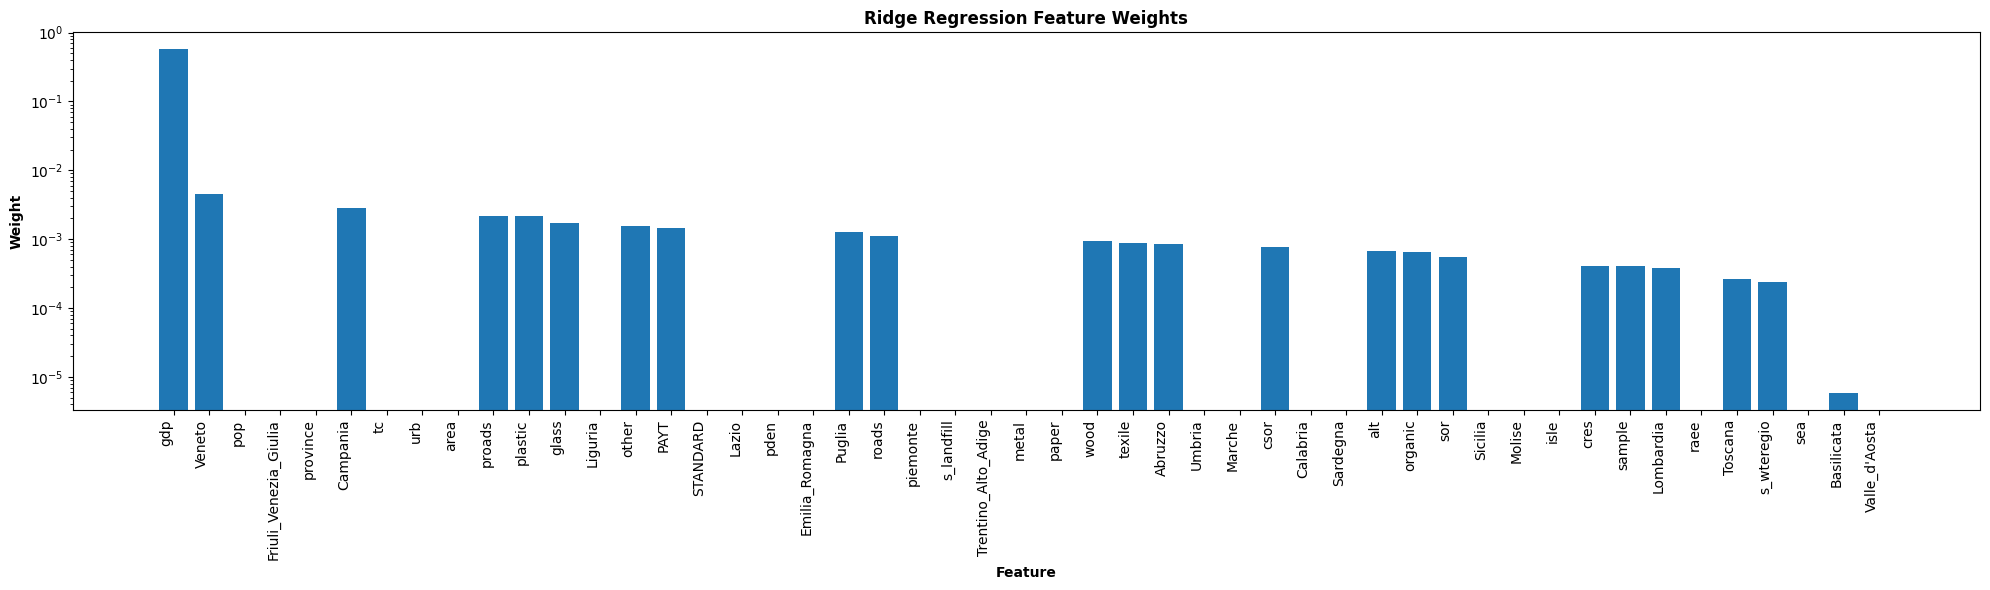

In [97]:
# Visulaize the weights of the features
feat_wt = {}
for feat,wt in zip(feature_list, weights_ridge):
  feat_wt[feat] = wt


import matplotlib.pyplot as plt

features = list(feat_wt.keys())
weights = list(feat_wt.values())

sorted_indices = np.argsort(np.abs(weights))[::-1]  # Reverse for descending order
features = [features[i] for i in sorted_indices]
weights = [weights[i] for i in sorted_indices]

plt.figure(figsize=(20, 6))
plt.bar(features, weights)
plt.yscale("log")

plt.xlabel("Feature",weight='bold')
plt.ylabel("Weight",weight='bold')
plt.title("Ridge Regression Feature Weights",weight='bold')
plt.xticks(rotation=90, ha="right")  # Rotate feature labels for readability
plt.tight_layout()
plt.show()


GDP has the most weightage in deciding the waste management cost

###**Lasso Regression**

In [70]:
la_grid.fit(xu9_train_scaled,yu4_train)
yla_test_pred=la_grid.predict(xu9_test_scaled)
yla_train_pred=la_grid.predict(xu9_train_scaled)
print('R2 score for Lasso Regression for the train data:',la_grid.score(xu9_train_scaled,yu4_train))
print('mean squared error for Lasso Regression for the train data: ',mean_squared_error(yu4_train,yla_train_pred))

print('R2 score for Lasso Regression for the test data:',la_grid.score(xu9_test_scaled,yu4_test))
print('mean squared error for Lasso Regression for the test data: ',mean_squared_error(yu4_test,yla_test_pred))

R2 score for Lasso Regression for the train data: 0.9977670104283616
mean squared error for Lasso Regression for the train data:  0.0007095660666950085
R2 score for Lasso Regression for the test data: 0.9973402210038174
mean squared error for Lasso Regression for the test data:  0.0008724106999803523


In [93]:
weights_lasss = list(la_grid.coef_)

print(weights)


[0.568107548385794, 0.004570677201101611, -0.0035322039512906854, -0.002911260166250165, -0.0028334411922803816, 0.0028140474964403043, -0.0027677017739905626, -0.002606357233025886, -0.0025224064693636907, 0.00215849249319763, 0.002151472233750617, 0.001727426241275118, -0.0016470722937166555, 0.0015372314830957652, 0.0014556991590119722, -0.0014556991558781873, -0.001411798004277895, -0.0012952830611023545, -0.0012689789166478586, 0.0012676506135516374, 0.0011131647072112497, -0.0010882747653579385, -0.0010880082900638507, -0.00102121821823776, -0.0010052506062327717, -0.0009567067961797416, 0.0009398176570660496, 0.000866139963468456, 0.0008489497429422886, -0.0007946018528810624, -0.0007751320459479991, 0.000761725126412226, -0.0007532566254368356, -0.0007506004341486628, 0.0006733979952161555, 0.000651538325638169, 0.0005440473554356514, -0.0005139754173750465, -0.00045985630462764475, -0.00042125091785414254, 0.00041411481359192944, 0.0004066966072485858, 0.0003768879490249358, -

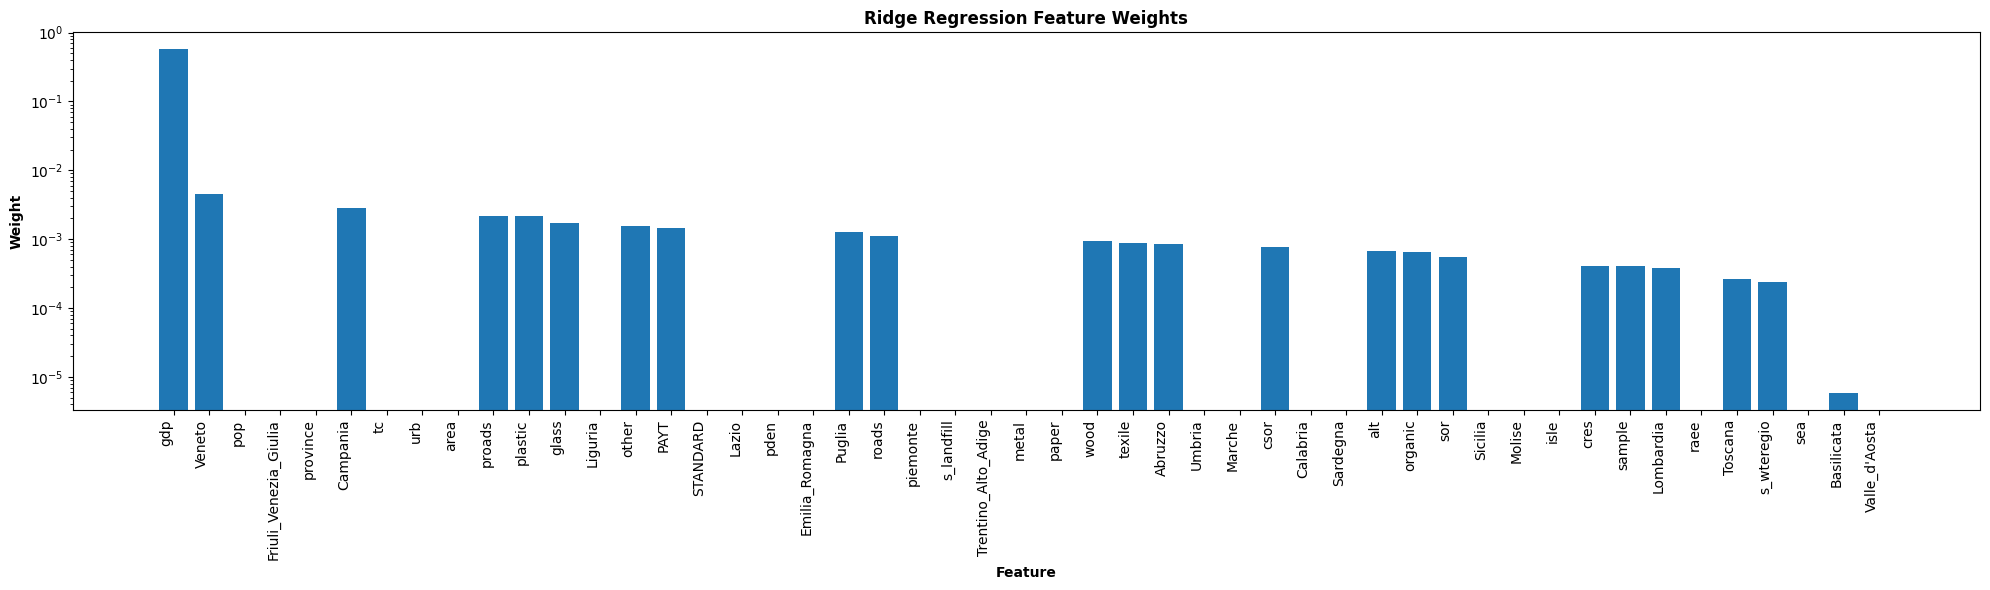

In [98]:
# Visulaize the weights of the features
feat_wt_lasso = {}
for feat,wt in zip(feature_list, weights_ridge):
  feat_wt_lasso[feat] = wt


import matplotlib.pyplot as plt

features = list(feat_wt_lasso.keys())
weights = list(feat_wt_lasso.values())

# Sort by absolute weight (descending)
sorted_indices = np.argsort(np.abs(weights))[::-1]  # Reverse for descending order
features = [features[i] for i in sorted_indices]
weights = [weights[i] for i in sorted_indices]

plt.figure(figsize=(20, 6))
plt.bar(features, weights)
plt.yscale('log')
plt.xlabel("Feature",weight='bold')
plt.ylabel("Weight",weight='bold')
plt.title("Ridge Regression Feature Weights",weight='bold')
plt.xticks(rotation=90, ha="right")  # Rotate feature labels for readability
plt.tight_layout()
plt.show()


###**KNN Regression model**

In [71]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
n_neighbors=[]
j=1
for i in range (1,21):
  j=j+2
  n_neighbors.append(j)
param_grid={'n_neighbors':n_neighbors}
knn_grid_search=GridSearchCV(estimator=knn,param_grid=param_grid)
knn_grid_search.fit(xu9_train_scaled,yu4_train)
print('Best KNN estimator: ',knn_grid_search.best_estimator_)

Best KNN estimator:  KNeighborsRegressor(n_neighbors=7)


In [72]:
#now training the KNN regression model using best KNN estimator:
knn_grid=knn_grid_search.best_estimator_

yknn_test_pred=knn_grid.predict(xu9_test_scaled)
yknn_train_pred=knn_grid.predict(xu9_train_scaled)
print('R2 score for KNN Regression for the train data:',knn_grid.score(xu9_train_scaled,yu4_train))
print('mean squared error for KNN Regression for the train data: ',mean_squared_error(yu4_train,yknn_train_pred))

print('R2 score for KNN Regression for the test data:',knn_grid.score(xu9_test_scaled,yu4_test))
print('mean squared error for KNN Regression for the test data: ',mean_squared_error(yu4_test,yknn_test_pred))

R2 score for KNN Regression for the train data: 0.7843087182593099
mean squared error for KNN Regression for the train data:  0.06853915322714588
R2 score for KNN Regression for the test data: 0.6952424120692063
mean squared error for KNN Regression for the test data:  0.09996085426368663
